In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import unicodedata
from pandas.tseries.offsets import DateOffset
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("coffeeQuality.csv")

In [5]:
df.head()

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [7]:
df.tail()

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
1334,1334,Robusta,luis robles,Ecuador,robustasa,Lavado 1,our own lab,NaN,robustasa,NaN,...,Blue-Green,1,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN
1335,1335,Robusta,luis robles,Ecuador,robustasa,Lavado 3,own laboratory,NaN,robustasa,40,...,Blue-Green,0,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,40.0,40.0,40.0
1336,1336,Robusta,james moore,United States,fazenda cazengo,NaN,cafe cazengo,NaN,global opportunity fund,795 meters,...,NaN,6,"December 23rd, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,795.0,795.0,795.0
1337,1337,Robusta,cafe politico,India,NaN,NaN,NaN,14-1118-2014-0087,cafe politico,NaN,...,Green,1,"August 25th, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN
1338,1338,Robusta,cafe politico,Vietnam,NaN,NaN,NaN,NaN,cafe politico,NaN,...,NaN,9,"August 25th, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1339 non-null   int64  
 1   Species                1339 non-null   object 
 2   Owner                  1332 non-null   object 
 3   Country.of.Origin      1338 non-null   object 
 4   Farm.Name              980 non-null    object 
 5   Lot.Number             276 non-null    object 
 6   Mill                   1021 non-null   object 
 7   ICO.Number             1180 non-null   object 
 8   Company                1130 non-null   object 
 9   Altitude               1113 non-null   object 
 10  Region                 1280 non-null   object 
 11  Producer               1107 non-null   object 
 12  Number.of.Bags         1338 non-null   float64
 13  Bag.Weight             1339 non-null   object 
 14  In.Country.Partner     1339 non-null   object 
 15  Harv

In [13]:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [15]:
df.drop_duplicates()

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,1334,Robusta,luis robles,Ecuador,robustasa,Lavado 1,our own lab,NaN,robustasa,NaN,...,Blue-Green,1,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN
1335,1335,Robusta,luis robles,Ecuador,robustasa,Lavado 3,own laboratory,NaN,robustasa,40,...,Blue-Green,0,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,40.0,40.0,40.0
1336,1336,Robusta,james moore,United States,fazenda cazengo,NaN,cafe cazengo,NaN,global opportunity fund,795 meters,...,NaN,6,"December 23rd, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,795.0,795.0,795.0
1337,1337,Robusta,cafe politico,India,NaN,NaN,NaN,14-1118-2014-0087,cafe politico,NaN,...,Green,1,"August 25th, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN


In [17]:
df.isnull().sum().sum()

4045

In [23]:
df.drop(columns = {'Unnamed: 0','Certification.Address','Certification.Contact','Lot.Number','ICO.Number','Altitude'},inplace = True)

KeyError: "['Lot.Number', 'ICO.Number', 'Unnamed: 0', 'Certification.Address', 'Altitude', 'Certification.Contact'] not found in axis"

In [26]:
df['Color'].unique()

array(['Green', nan, 'Bluish-Green', 'Blue-Green'], dtype=object)

In [28]:
df['Color'].fillna("Others",inplace=True)

In [30]:
df['Variety'].unique()

array([nan, 'Other', 'Bourbon', 'Catimor', 'Ethiopian Yirgacheffe',
       'Caturra', 'SL14', 'Sumatra', 'SL34', 'Hawaiian Kona',
       'Yellow Bourbon', 'SL28', 'Gesha', 'Catuai', 'Pacamara', 'Typica',
       'Sumatra Lintong', 'Mundo Novo', 'Java', 'Peaberry', 'Pacas',
       'Mandheling', 'Ruiru 11', 'Arusha', 'Ethiopian Heirlooms',
       'Moka Peaberry', 'Sulawesi', 'Blue Mountain', 'Marigojipe',
       'Pache Comun'], dtype=object)

In [32]:
df['Variety'].fillna("Other",inplace=True)

In [34]:
df['Processing.Method'].unique()

array(['Washed / Wet', nan, 'Natural / Dry', 'Pulped natural / honey',
       'Semi-washed / Semi-pulped', 'Other'], dtype=object)

In [36]:
df['Processing.Method'].fillna("Other",inplace=True)

#### Replacing Harvest Year

In [38]:
df['Harvest.Year'].unique()

array(['2014', nan, '2013', '2012', 'Mar-10', 'Sept 2009 - April 2010',
       'May-August', '2009/2010', '2015', '2011', '2016', '2015/2016',
       '2010', 'Fall 2009', '2017', '2009 / 2010', '2010-2011',
       '2009-2010', '2009 - 2010', '2013/2014', '2017 / 2018', 'mmm',
       'TEST', 'December 2009-March 2010', '2014/2015', '2011/2012',
       'Jan-11', '4T/10', '2016 / 2017', '23-Jul-10',
       'January Through April', '1T/2011', '4t/2010', '4T/2010',
       'August to December', 'Mayo a Julio', '47/2010', 'Abril - Julio',
       '4t/2011', 'Abril - Julio /2011', 'Spring 2011 in Colombia.',
       '3T/2011', '2016/2017', '1t/2011', '2018', '4T72010', '08/09 crop'],
      dtype=object)

In [42]:
def format_harvest_year(yr):
    if pd.isna(yr):
        return None
    yr = str(yr).strip()
    
    # Pattern: '08/09' -> 2008 (assume before 30 means 2000s, else 1900s if needed)
    if re.fullmatch(r'\d{2}/\d{2}', yr):
        first_part = int(yr.split('/')[0])
        if first_part < 30:
            return 2000 + first_part
        else:
            return 1900 + first_part

    # Pattern: '2008/2009' -> 2008
    if re.fullmatch(r'\d{4}/\d{4}', yr):
        return int(yr.split('/')[0])
    
    # Pattern: valid 4-digit year
    if re.fullmatch(r'\d{4}', yr):
        return int(yr)

    # Ignore/skip anything else
    return None

df['Harvest.Year'] = df['Harvest.Year'].apply(format_harvest_year)
df['Harvest.Year'] = df['Harvest.Year'].astype('Int64')

In [44]:
df['Harvest.Year'].unique() 

<IntegerArray>
[<NA>]
Length: 1, dtype: Int64

In [46]:
df['Grading.Date'] = df['Grading.Date'].astype(str).str.replace(r'(\d+)(st|nd|rd|th)', r'\1', regex=True)
df['Expiration'] = df['Expiration'].astype(str).str.replace(r'(\d+)(st|nd|rd|th)', r'\1', regex=True)

In [48]:
# Convert Grading and Expiration dates to datetime
df['Grading.Date'] = pd.to_datetime(df['Grading.Date'], errors='coerce')
df['Expiration'] = pd.to_datetime(df['Expiration'], errors='coerce')  

# Calculate difference in years
df['Years_to_Grading'] = df['Grading.Date'].dt.year - df['Harvest.Year']
df['Years_to_Expiration'] = df['Expiration'].dt.year - df['Harvest.Year']

# Preview
print(df[['Harvest.Year', 'Grading.Date', 'Expiration', 'Years_to_Grading', 'Years_to_Expiration']].head())

   Harvest.Year Grading.Date Expiration  Years_to_Grading  Years_to_Expiration
0          <NA>   2015-04-04 2016-04-03              <NA>                 <NA>
1          <NA>   2015-04-04 2016-04-03              <NA>                 <NA>
2          <NA>   2010-05-31 2011-05-31              <NA>                 <NA>
3          <NA>   2015-03-26 2016-03-25              <NA>                 <NA>
4          <NA>   2015-04-04 2016-04-03              <NA>                 <NA>


In [50]:
# Filter rows where -1 exists
mask = (df['Years_to_Grading'] == -1) | (df['Years_to_Expiration'] == -1)
rows_with_negative_one = df.loc[mask, ['Grading.Date', 'Harvest.Year', 'Years_to_Grading', 'Years_to_Expiration']]

# Display the relevant rows
print(rows_with_negative_one)


Empty DataFrame
Columns: [Grading.Date, Harvest.Year, Years_to_Grading, Years_to_Expiration]
Index: []


In [54]:
df.loc[df['Years_to_Grading'] == -1, 'Harvest.Year'] = (
    pd.to_datetime(df.loc[df['Years_to_Grading'] == -1, 'Harvest.Year'], format='%Y') 
    - DateOffset(years=1)
).dt.year

In [60]:
df['Harvest.Year'] = df['Harvest.Year'].fillna(
    (df['Grading.Date'] - DateOffset(years=1)).dt.year
)

In [62]:
df.drop(columns={'Years_to_Grading', 'Years_to_Expiration'},inplace=True)

KeyError: "['Years_to_Expiration', 'Years_to_Grading'] not found in axis"

#### Removing Inconsistences in All category Columns

In [64]:
categorical_cols = df.select_dtypes(include='object').columns

In [66]:
def clean_text(text):
    if pd.isnull(text):
        return text
    text = unicodedata.normalize('NFKD', text) #Normalization Form Compatibility Decomposition
    text = text.encode('ascii', 'ignore').decode('utf-8')
    text = re.sub(r"[^a-zA-Z\s'\-]", '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip().title()

In [68]:
for col in categorical_cols:
    df[col] = df[col].apply(clean_text)

In [70]:
equal = df['Owner'].fillna('Missing') == df['Owner.1'].fillna('Missing')
print(equal.sum())

1336


In [72]:
df.drop(columns='Owner.1',inplace= True)

#### Replacing Owner Column

In [76]:
missing_owners = df[df['Owner'].isnull()]

print(missing_owners[['Country.of.Origin']].value_counts())

Country.of.Origin
Honduras             6
Colombia             1
Name: count, dtype: int64


In [78]:
def fill_owner_by_country(df, column):
    df[column] = df.groupby('Country.of.Origin')[column].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x)
    return df

df = fill_owner_by_country(df, 'Owner')

In [80]:
null_counts_per_row = df.isnull().sum(axis=1)

max_nulls = null_counts_per_row.max()

df = df[null_counts_per_row != max_nulls]

print(f"Dropped rows with {max_nulls} nulls.")
print(f"New shape: {df.shape}")

Dropped rows with 10 nulls.
New shape: (1338, 37)


In [82]:
df['Farm.Name'].fillna("Unknown",inplace=True)

In [86]:
df['Mill'].fillna("Unknown",inplace=True)

In [88]:
df['Company'].fillna("Unknown",inplace=True)

In [90]:
df['Region'].fillna("Unknown",inplace=True)

In [94]:
df['Producer'].fillna("Unknown",inplace=True)

In [100]:
df.loc[(df['Category.One.Defects'] == 0) & (df['Quakers'].isnull()), 'Quakers'] = 0

In [102]:
def safe_mode(s):  
    return s.mode()[0] if not s.mode().empty else np.nan

df['Number.of.Bags'] = df['Number.of.Bags'].fillna(
    df.groupby(['Country.of.Origin', 'Farm.Name', 'Mill'])['Number.of.Bags']
      .transform(safe_mode)
)

In [106]:
def safe_mode(series):
    return series.mode()[0] if not series.mode().empty else np.nan

df['altitude_low_meters'] = df['altitude_low_meters'].fillna(
    df.groupby(['Species', 'Country.of.Origin', 'In.Country.Partner', 'unit_of_measurement'])['altitude_low_meters']
      .transform(safe_mode)
)

df['altitude_low_meters'] = df['altitude_low_meters'].fillna(
    df.groupby(['Country.of.Origin'])['altitude_low_meters']
      .transform(safe_mode)
)


In [110]:
def safe_mode(series):
    return series.mode()[0] if not series.mode().empty else np.nan

df['altitude_high_meters'] = df['altitude_high_meters'].fillna(
    df.groupby(['Species', 'Country.of.Origin', 'In.Country.Partner', 'unit_of_measurement'])['altitude_high_meters']
      .transform(safe_mode)
)

df['altitude_high_meters'] = df['altitude_high_meters'].fillna(
    df.groupby(['Country.of.Origin'])['altitude_high_meters']
      .transform(safe_mode)
)


In [114]:
null_rows = df['altitude_mean_meters'].isnull()

mean_values = df.loc[null_rows, ['altitude_low_meters', 'altitude_high_meters']].mean(axis=1)

df.loc[null_rows, 'altitude_mean_meters'] = mean_values

In [116]:
df.isnull().sum().sum()

0

In [118]:
df['Certification.Body'].nunique()

25

In [120]:
df['Country.of.Origin'].nunique()

36

In [122]:
df['Farm.Name'].nunique()

550

In [124]:
df['Owner'].nunique()

315

In [126]:
df['Mill'].nunique()

441

In [128]:
df['Company'].nunique()

278

In [130]:
df['Region'].nunique()

345

In [132]:
df['Producer'].nunique()

631

In [134]:
df['In.Country.Partner'].nunique()

26

In [136]:
df['Species'].nunique()

2

In [138]:
df['Variety'].nunique()

27

In [140]:
df['Processing.Method'].nunique()

5

In [142]:
df['Processing.Method'].unique()

array(['Washed Wet', 'Other', 'Natural Dry', 'Pulped Natural Honey',
       'Semi-Washed Semi-Pulped'], dtype=object)

In [144]:
df['Color'].nunique()

4

In [146]:
matching_count = (df['In.Country.Partner'] == df['Certification.Body']).sum()
print("Number of matching rows:", matching_count)

Number of matching rows: 1337


In [148]:
df.drop(columns='In.Country.Partner',inplace=True)

#### Converting all lbs to kg

In [154]:
lbs_mask = df['Bag.Weight'].str.lower().str.contains('lbs', na=False)

df.loc[lbs_mask, 'Number.of.Bags'] = df.loc[lbs_mask, 'Number.of.Bags'] * 0.453592

df['Number.of.Bags'] = df['Number.of.Bags'].round(2)

#### Converting ft to m

In [158]:
ft_mask = df['unit_of_measurement'].str.lower() == 'ft'

cols_to_convert = ['altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters']
df.loc[ft_mask, cols_to_convert] = df.loc[ft_mask, cols_to_convert] * 0.3048

df[cols_to_convert] = df[cols_to_convert].round(2)

In [162]:
df.drop(columns={'unit_of_measurement','Bag.Weight'},inplace=True)

KeyError: "['unit_of_measurement', 'Bag.Weight'] not found in axis"

In [164]:
quality_cols = [
    'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
    'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
    'Total.Cup.Points'
]

df = df[~(df[quality_cols] == 0).all(axis=1)]


In [166]:
df.shape

(1337, 34)

## Univariate Analysis

## Check For Outliers

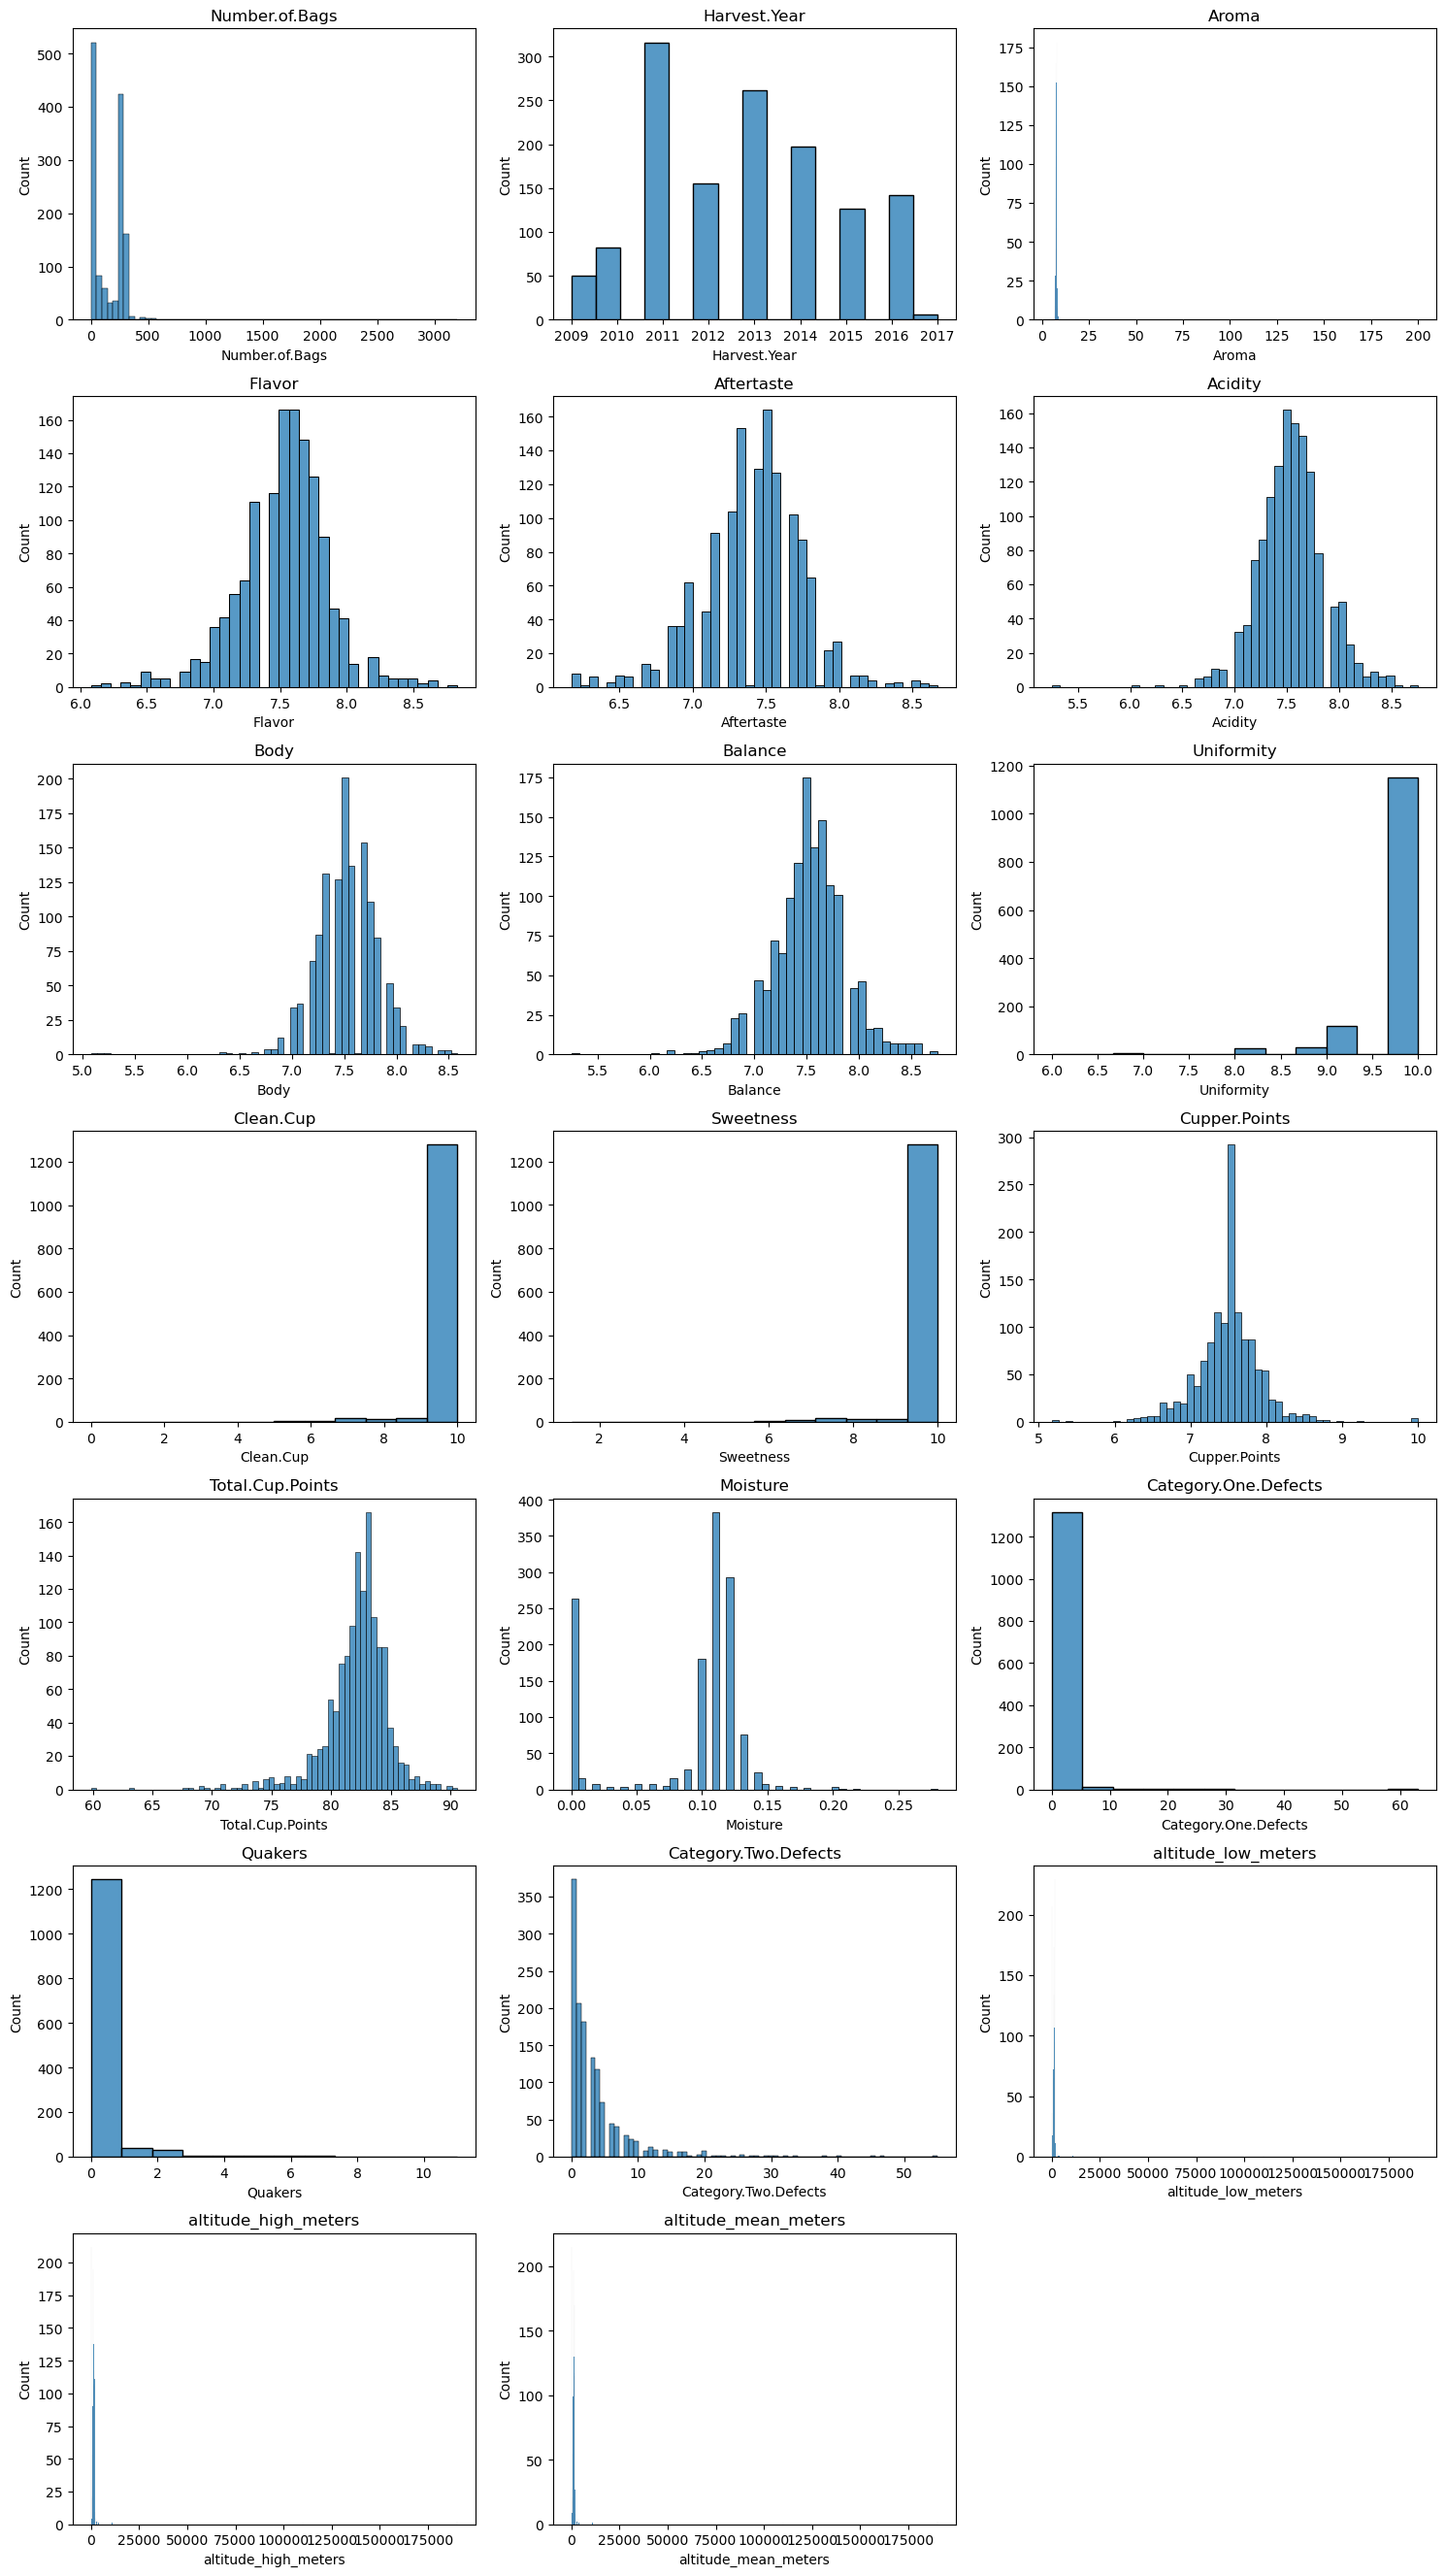

In [168]:
numeric_columns = df.select_dtypes(include='number')

plt.figure(figsize=(15, 30))
for i in range(len(numeric_columns.columns)):
    plt.subplot(8, 3, i + 1)
    sns.histplot(data=df, x=numeric_columns.columns[i])
    plt.title(numeric_columns.columns[i])
    plt.tight_layout()

plt.show()

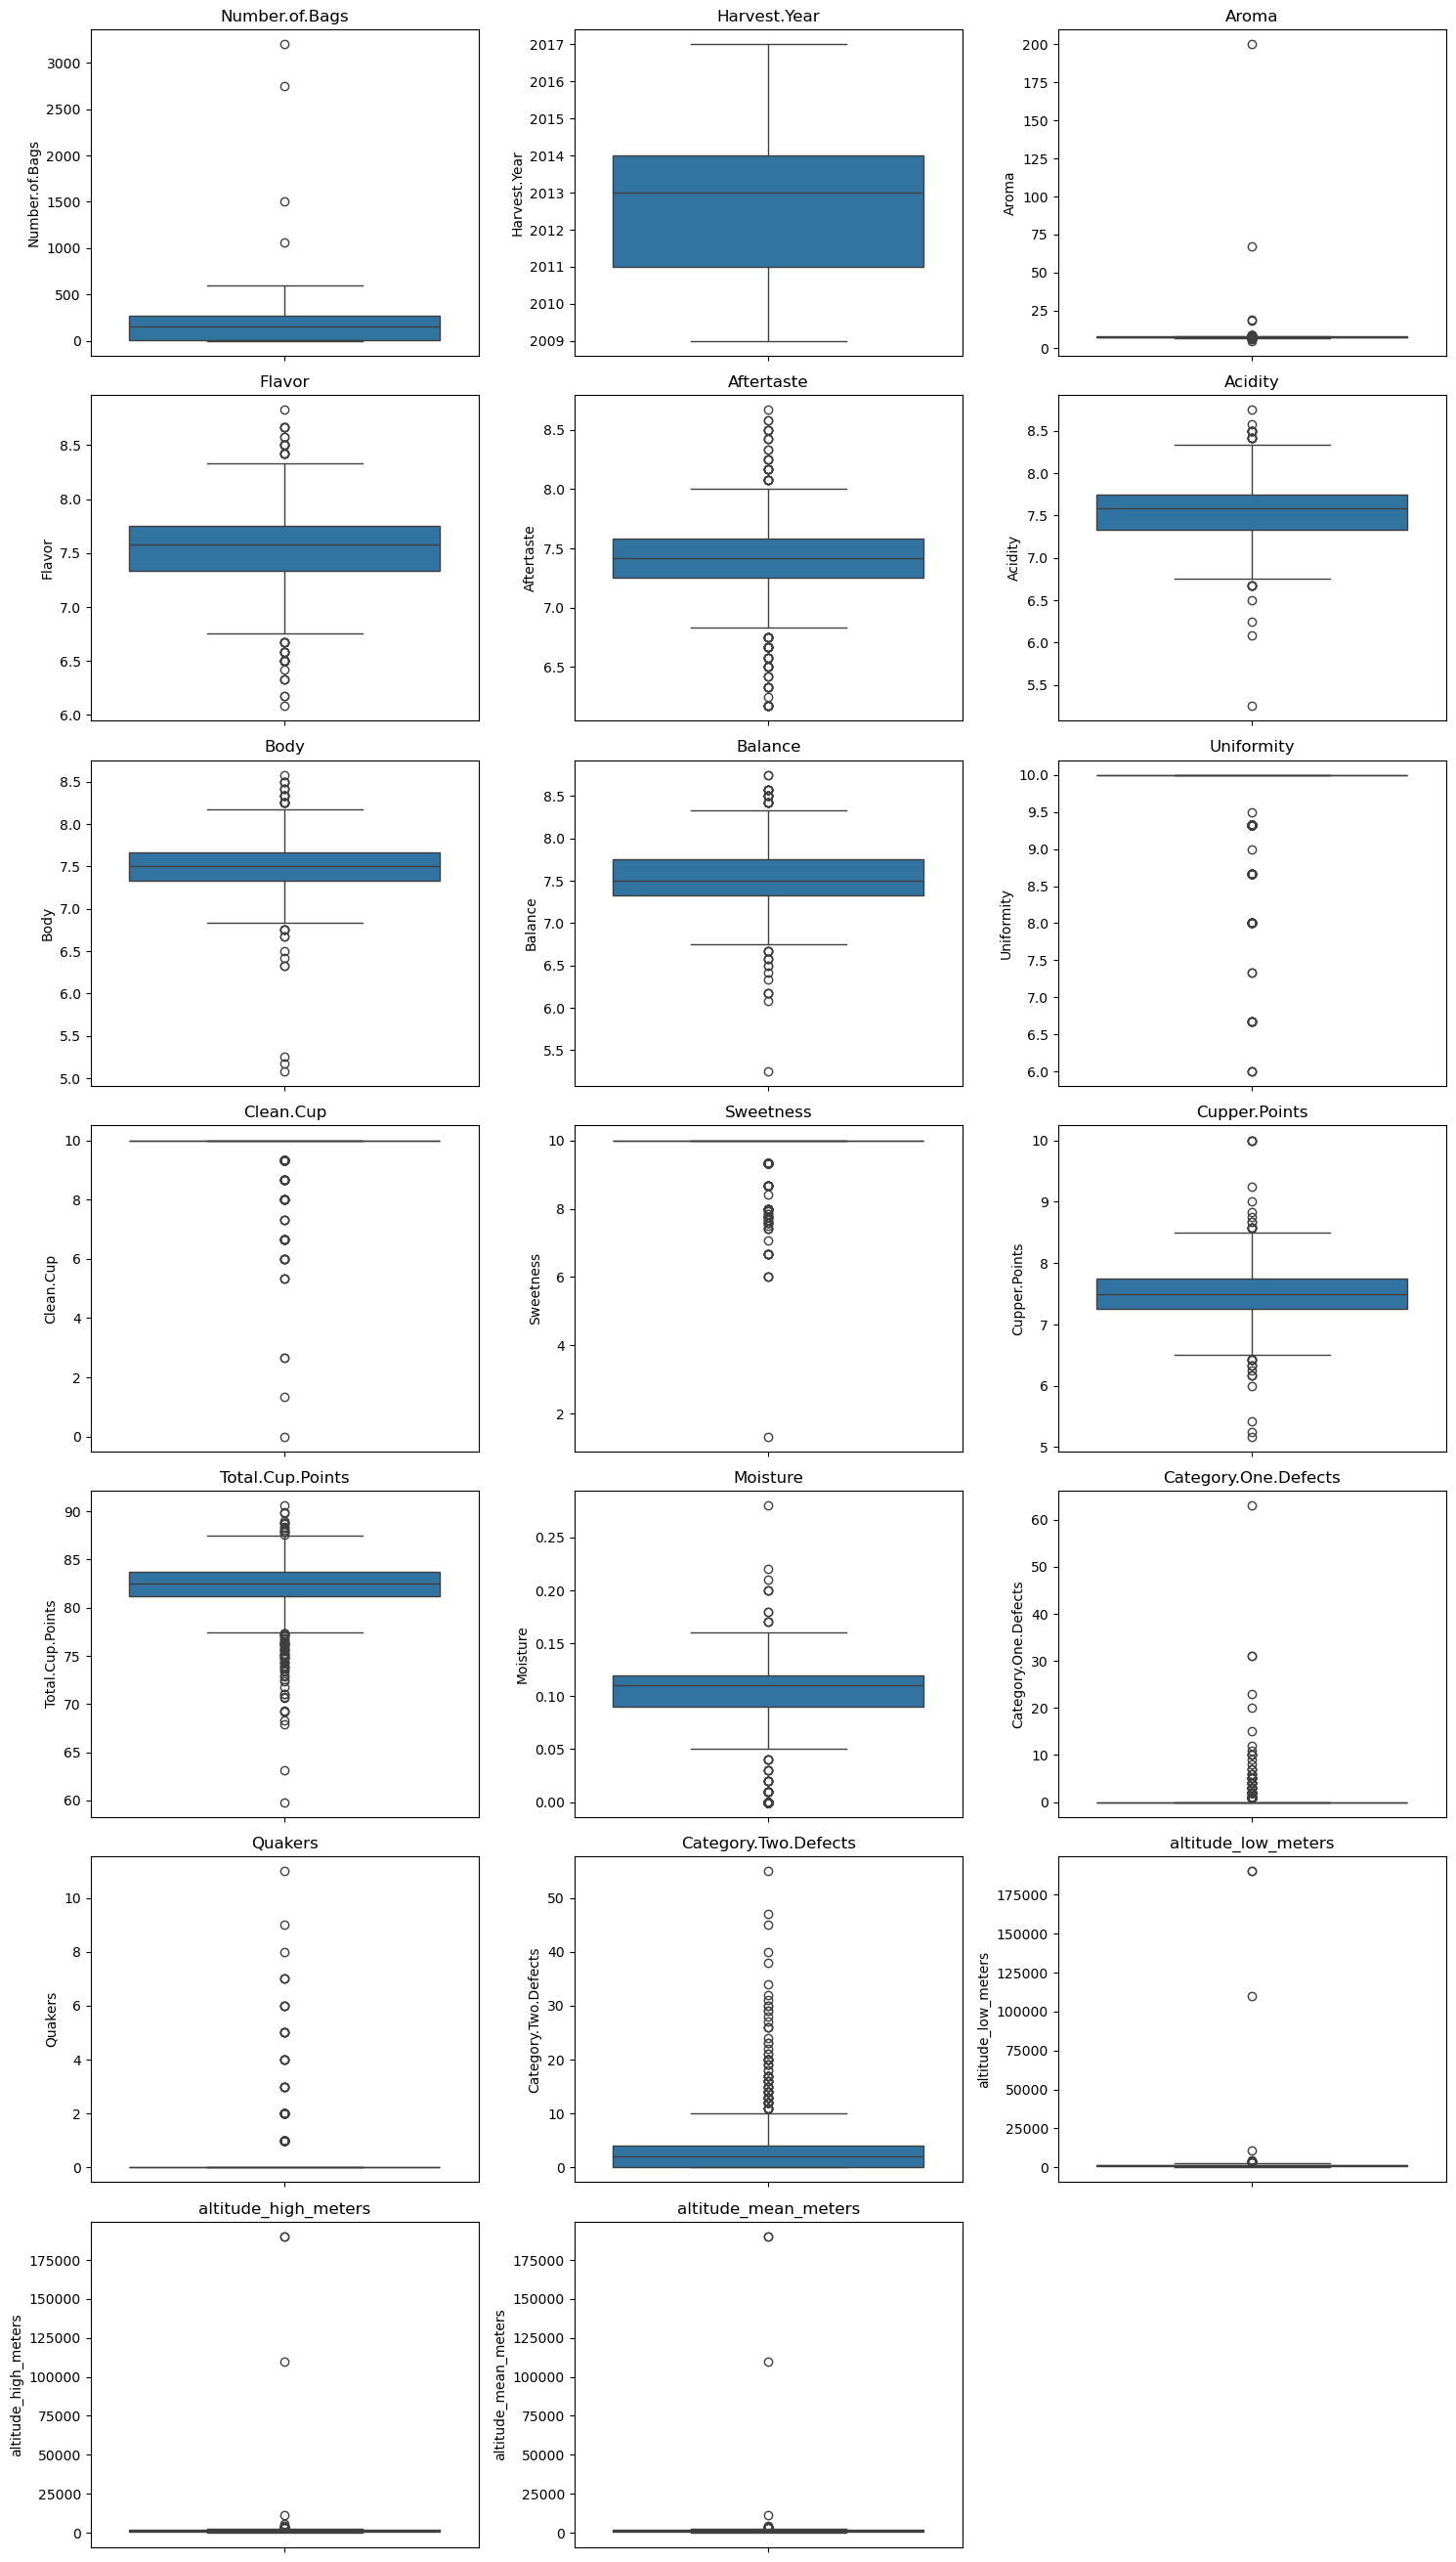

In [169]:
numeric_columns = df.select_dtypes(include='number') # Select only numerical columns

plt.figure(figsize=(15, 30))
for i in range(len(numeric_columns.columns)):
    plt.subplot(8, 3, i + 1)
    sns.boxplot(y=numeric_columns.columns[i], data=df)
    plt.title(numeric_columns.columns[i])
    plt.tight_layout()

plt.show()

### Replacing Outliers

In [172]:
quality_col = df[['Aroma','Flavor','Aftertaste','Acidity','Body','Balance','Uniformity','Clean.Cup','Sweetness','Cupper.Points']]

In [176]:
quality_col = df[['Aroma','Flavor','Aftertaste','Acidity','Body','Balance','Uniformity','Clean.Cup','Sweetness','Cupper.Points']]

invalid_values = {}

for col in quality_col.columns:
    invalid = quality_col[(quality_col[col] < 1) | (quality_col[col] > 10)][col]
    if not invalid.empty:
        invalid_values[col] = invalid.tolist()

if invalid_values:
    for col, vals in invalid_values.items():
        print(f"Invalid values in column '{col}': {vals}")
else:
    print("All values are within the range 1 to 10.")


Invalid values in column 'Aroma': [18.0, 19.2, 67.35, 200.0]
Invalid values in column 'Clean.Cup': [0.0]


In [178]:
other_cols = ['Flavor','Aftertaste','Acidity','Body','Balance','Uniformity','Clean.Cup','Sweetness','Cupper.Points']

mask = df['Aroma'] > 10
df.loc[mask, 'Aroma'] = df.loc[mask, 'Total.Cup.Points'] - df.loc[mask, other_cols].sum(axis=1)


In [180]:
clean_cup_median = df['Clean.Cup'].median()

mask = df['Clean.Cup'] < 1

df.loc[mask, 'Clean.Cup'] = clean_cup_median

difference = clean_cup_median - df.loc[mask, 'Clean.Cup']

df.loc[mask, 'Total.Cup.Points'] += difference


### Replace number of bags

In [182]:
Q1 = df['Number.of.Bags'].quantile(0.25)
Q3 = df['Number.of.Bags'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [184]:
print("at 90% ,no.of.bags is ",df['Number.of.Bags'].quantile(0.90))
print("at 95% ,no.of.bags is ",df['Number.of.Bags'].quantile(0.95))
print("at 100% ,no.of.bags is ",df['Number.of.Bags'].quantile(1.0))

at 90% ,no.of.bags is  300.0
at 95% ,no.of.bags is  320.0
at 100% ,no.of.bags is  3200.0


In [186]:
median_bags = df['Number.of.Bags'].median()
def replace_outlier(row):
    value = row['Number.of.Bags']
    if value < lower_bound or value > upper_bound:
        similar_rows = df[
            ((df['Farm.Name'] == row['Farm.Name']) | 
             (df['Mill'] == row['Mill'])) & 
            (df.index != row.name)
        ]
        if not similar_rows.empty:
            mode_value = similar_rows['Number.of.Bags'].mode()
            if not mode_value.empty:
                return mode_value.iloc[0]
        return median_bags
    return value

# Reset index and apply
df = df.reset_index(drop=True)
df['Number.of.Bags'] = df.apply(replace_outlier, axis=1)


### Replacing Altitudes

In [190]:
df.drop(columns={'altitude_low_meters','altitude_high_meters'},inplace =True)

KeyError: "['altitude_low_meters', 'altitude_high_meters'] not found in axis"

In [192]:
Q1 = df['altitude_mean_meters'].quantile(0.25)
Q3 = df['altitude_mean_meters'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound,upper_bound)

median_altitude = df['altitude_mean_meters'].median()


-400.0 2800.0


In [194]:
print("at 5% ,altitude_mean_meters is ",df['altitude_mean_meters'].quantile(0.05))
print("at 10% ,altitude_mean_meters is ",df['altitude_mean_meters'].quantile(0.10))
print("at 98% ,altitude_mean_meters is ",df['altitude_mean_meters'].quantile(0.98))

at 5% ,altitude_mean_meters is  39.64
at 10% ,altitude_mean_meters is  113.27
at 98% ,altitude_mean_meters is  2085.5999999999995


In [198]:
lower_5 = df['altitude_mean_meters'].quantile(0.05)
upper_98 = df['altitude_mean_meters'].quantile(0.98)


overall_median = df['altitude_mean_meters'].median()

def fill_outliers_only(row):
    value = row['altitude_mean_meters']
    if value <= lower_5 or value >= upper_98:
        group = df[
            (df['Country.of.Origin'] == row['Country.of.Origin']) &
            (df['Species'] == row['Species']) &
            (df['altitude_mean_meters'] > lower_5) &
            (df['altitude_mean_meters'] < upper_98)
        ]
        if not group.empty:
            return group['altitude_mean_meters'].median()
        else:
            return overall_median
    else:
        return value  

df['altitude_mean_meters'] = df.apply(fill_outliers_only, axis=1)

### Replacing Defects Columns

In [200]:
Q1 = df['Category.One.Defects'].quantile(0.25)
Q3 = df['Category.One.Defects'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound,upper_bound)


0.0 0.0


In [202]:
print("at 5% ,Category.One.Defects is ",df['Category.One.Defects'].quantile(0.05))
print("at 98% ,Category.One.Defects is ",df['Category.One.Defects'].quantile(0.95))
print("at 99.9% ,Category.One.Defects is ",df['Category.One.Defects'].quantile(0.995))

at 5% ,Category.One.Defects is  0.0
at 98% ,Category.One.Defects is  2.0
at 99.9% ,Category.One.Defects is  11.319999999999936


In [206]:
p = df['Category.One.Defects'].quantile(0.995) #99.5%
median_val = df['Category.One.Defects'].median()

df['Category.One.Defects'] = df['Category.One.Defects'].apply(
    lambda x: median_val if x > p else x
)

In [208]:
Q1 = df['Category.Two.Defects'].quantile(0.25)
Q3 = df['Category.Two.Defects'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound,upper_bound)

-6.0 10.0


In [210]:
print("at 5% ,Category.Two.Defects is ",df['Category.Two.Defects'].quantile(0.05))
print("at 95% ,Category.Two.Defects is ",df['Category.Two.Defects'].quantile(0.95))
print("at 98% ,Category.Two.Defects is ",df['Category.Two.Defects'].quantile(0.98))
print("at 99% ,Category.Two.Defects is ",df['Category.Two.Defects'].quantile(0.99))

at 5% ,Category.Two.Defects is  0.0
at 95% ,Category.Two.Defects is  13.0
at 98% ,Category.Two.Defects is  20.0
at 99% ,Category.Two.Defects is  26.6400000000001


In [212]:
lower = df['Category.Two.Defects'].quantile(0.001) 
upper = df['Category.Two.Defects'].quantile(0.98) 
median_val = df['Category.Two.Defects'].median()

df['Category.Two.Defects'] = df['Category.Two.Defects'].apply(
    lambda x: median_val if (x > upper) or (x < lower) else x
)

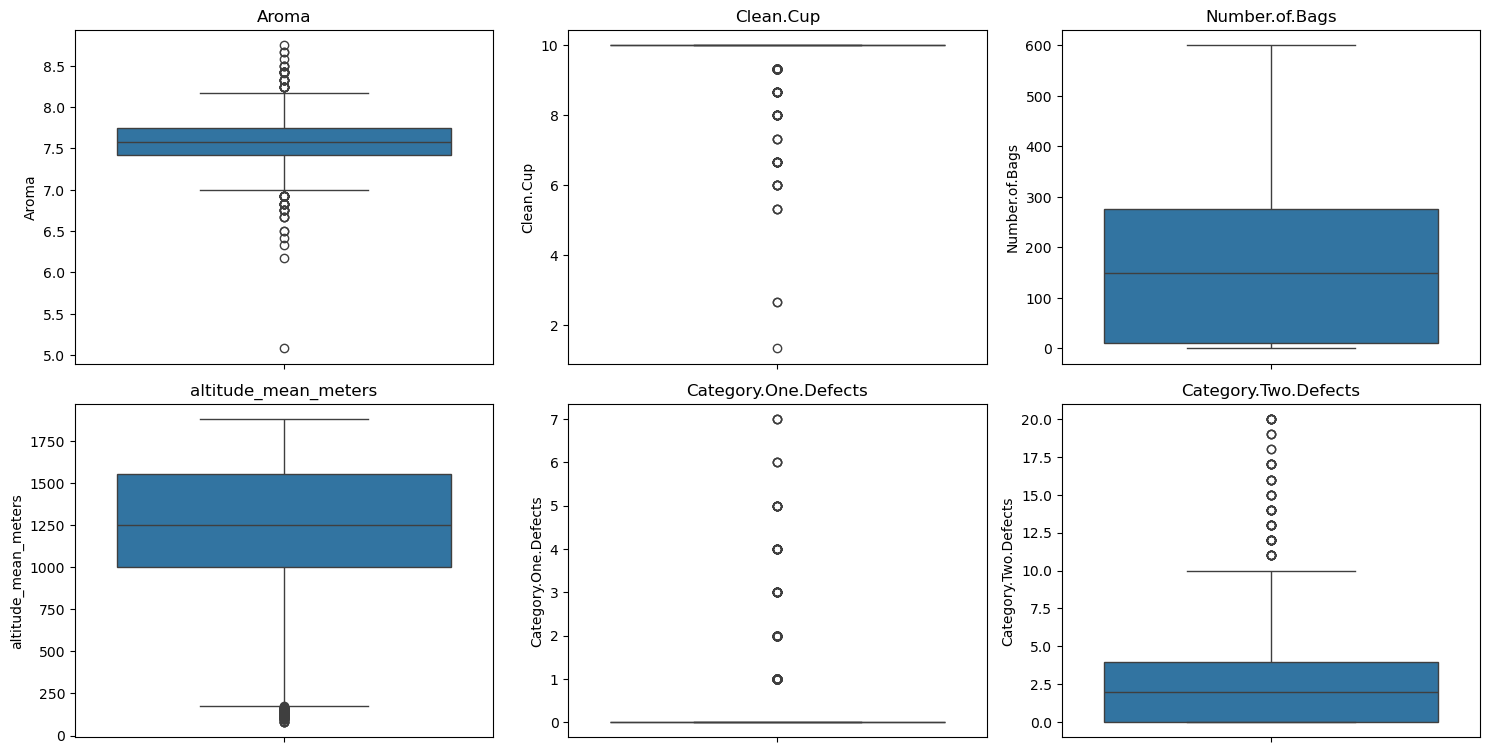

In [214]:
replace_columns = df[['Aroma','Clean.Cup','Number.of.Bags','altitude_mean_meters','Category.One.Defects','Category.Two.Defects']]

plt.figure(figsize=(15, 30))
for i in range(len(replace_columns.columns)):
    plt.subplot(8, 3, i + 1)
    sns.boxplot(y=replace_columns.columns[i], data=df)
    plt.title(replace_columns.columns[i])
    plt.tight_layout()

plt.show()

In [216]:
df['Total_Defects'] = df[['Category.One.Defects', 'Quakers', 'Category.Two.Defects']].sum(axis=1)

In [220]:
df.head()

,Species,Owner,Country.of.Origin,Farm.Name,Mill,Company,Region,Producer,Number.of.Bags,Harvest.Year,...,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,Expiration,Certification.Body,altitude_mean_meters,Total_Defects
0,Arabica,Metad Plc,Ethiopia,Metad Plc,Metad Plc,Metad Agricultural Developmet Plc,Guji-Hambela,Metad Plc,300.0,2014,...,90.58,0.12,0.0,0.0,Green,0.0,2016-04-03,Metad Agricultural Development Plc,1750.0,0.0
1,Arabica,Metad Plc,Ethiopia,Metad Plc,Metad Plc,Metad Agricultural Developmet Plc,Guji-Hambela,Metad Plc,300.0,2014,...,89.92,0.12,0.0,0.0,Green,1.0,2016-04-03,Metad Agricultural Development Plc,1750.0,1.0
2,Arabica,Grounds For Health Admin,Guatemala,San Marcos Barrancas San Cristobal Cuch,Unknown,Unknown,Unknown,Unknown,5.0,2009,...,89.75,0.00,0.0,0.0,Others,0.0,2011-05-31,Specialty Coffee Association,1700.0,0.0
3,Arabica,Yidnekachew Dabessa,Ethiopia,Yidnekachew Dabessa Coffee Plantation,Wolensu,Yidnekachew Debessa Coffee Plantation,Oromia,Yidnekachew Dabessa Coffee Plantation,320.0,2014,...,89.00,0.11,0.0,0.0,Green,2.0,2016-03-25,Metad Agricultural Development Plc,1750.0,2.0
4,Arabica,Metad Plc,Ethiopia,Metad Plc,Metad Plc,Metad Agricultural Developmet Plc,Guji-Hambela,Metad Plc,300.0,2014,...,88.83,0.12,0.0,0.0,Green,2.0,2016-04-03,Metad Agricultural Development Plc,1750.0,2.0


In [224]:
maximum = df['Total_Defects'].max()
minimum = df['Total_Defects'].min()
print("Maximum Total Defects:", maximum)
print("Minimum Total Defects:", minimum)

Maximum Total Defects: 25.0
Minimum Total Defects: 0.0


### CountPlot

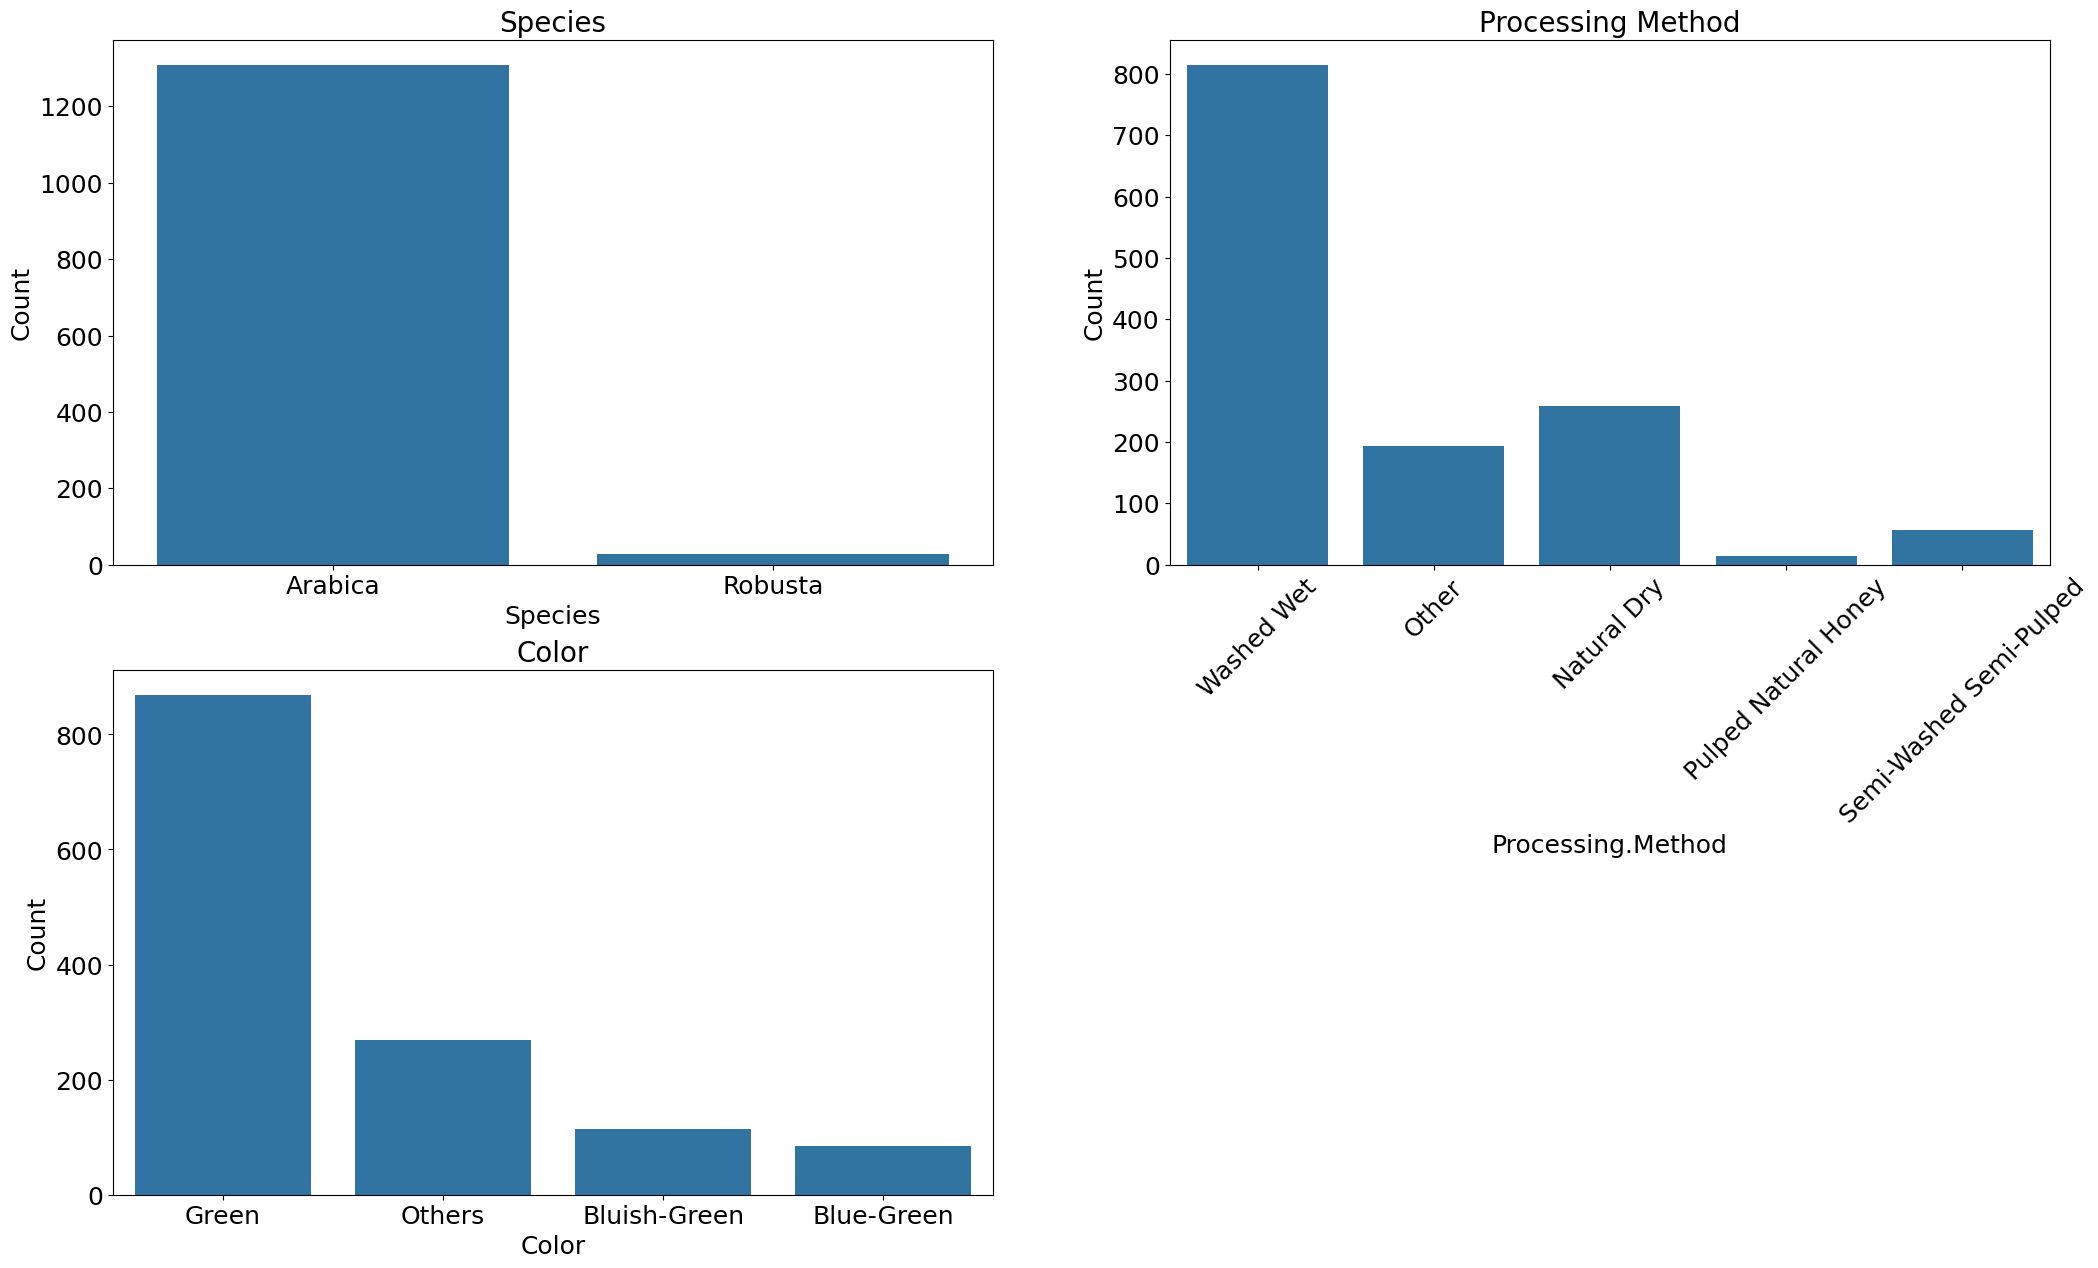

In [343]:
cols = ['Species', 'Processing.Method', 'Color']
titles = ['Species', 'Processing Method', 'Color']

plt.figure(figsize=(25, 15))

for i, (col, title) in enumerate(zip(cols, titles), 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=col)
    plt.xticks(fontsize=18, rotation=45 if col == 'Processing.Method' else 0)
    plt.yticks(fontsize=18)
    plt.xlabel(col, fontsize=18)
    plt.ylabel("Count", fontsize=18)
    plt.title(title, fontsize=20)

plt.show()



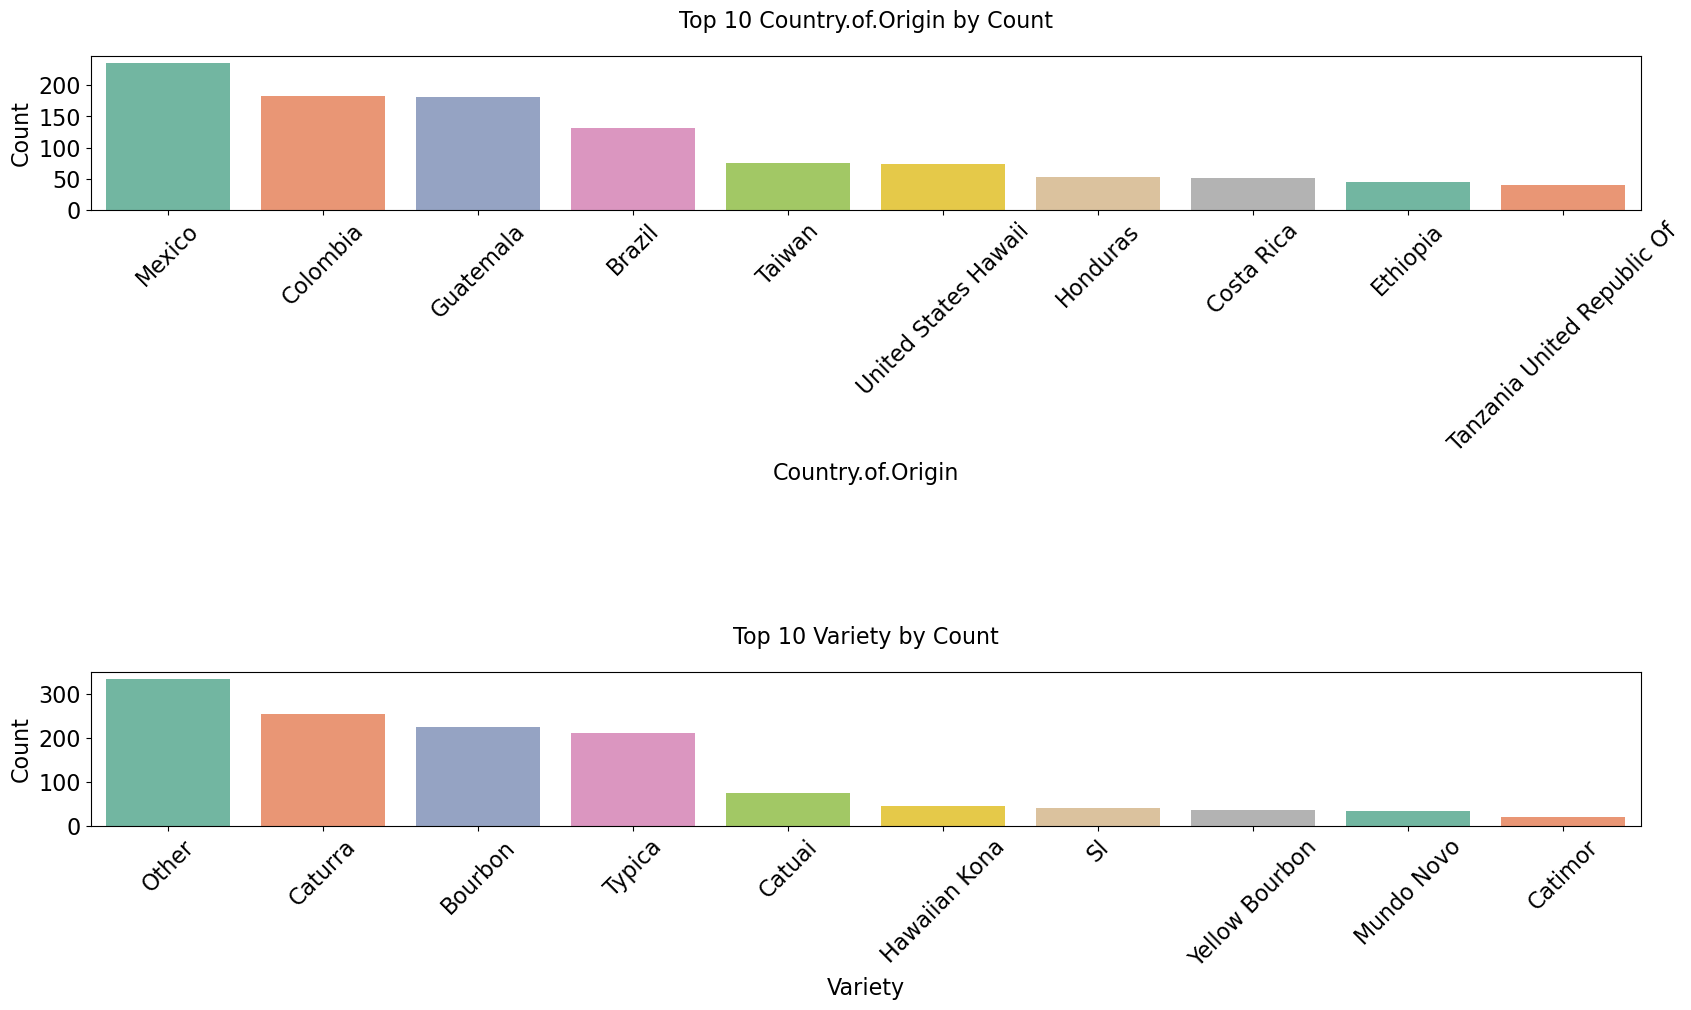

In [345]:
cols = ['Country.of.Origin','Variety']

plt.figure(figsize=(20, 5 * len(cols)))

for i, col in enumerate(cols, 1):
    top_values = df[col].value_counts().nlargest(10).index
    filtered_df = df[df[col].isin(top_values)]

    plt.subplot(len(cols), 1, i)
    sns.countplot(data=filtered_df, x=col, order=top_values, palette='Set2')

    plt.title(f"Top 10 {col} by Count", fontsize=16, pad=20) 
    plt.xticks(rotation=45, fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel(col, fontsize=16)
    plt.ylabel("Count", fontsize=16)

plt.subplots_adjust(hspace=3.0) 

plt.show()

# Bivariate Analysis

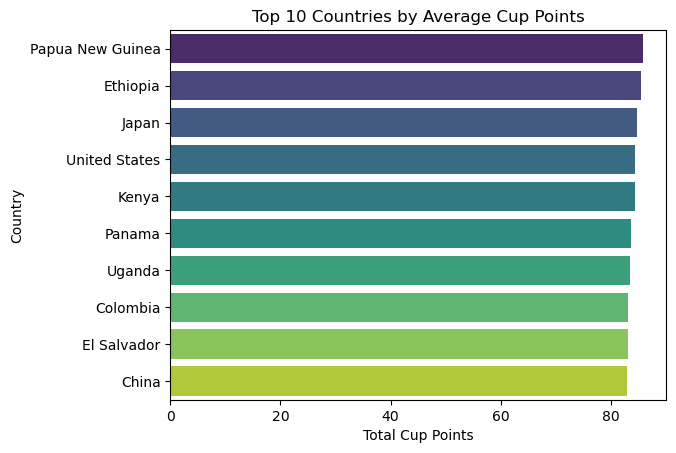

In [230]:
# 1. Top 10 countries by total cup points

top_countries = df.groupby("Country.of.Origin")["Total.Cup.Points"].mean().nlargest(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title("Top 10 Countries by Average Cup Points")
plt.xlabel("Total Cup Points")
plt.ylabel("Country")
plt.show()


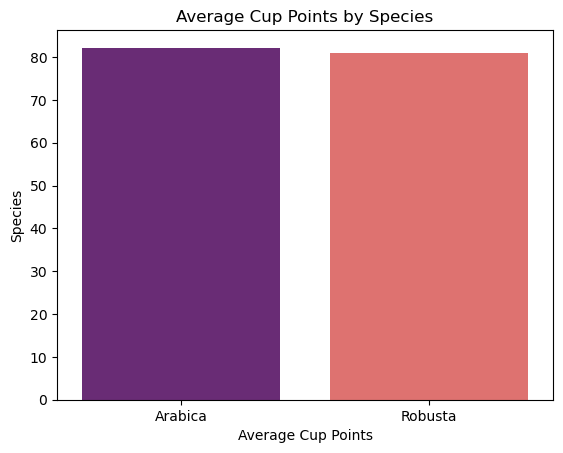

In [232]:
# 2. Average cup points by species

species_avg = df.groupby("Species")["Total.Cup.Points"].mean().sort_values(ascending=False)
sns.barplot(y=species_avg.values, x=species_avg.index, palette="magma")
plt.title("Average Cup Points by Species")
plt.xlabel("Average Cup Points")
plt.ylabel("Species")
plt.show()

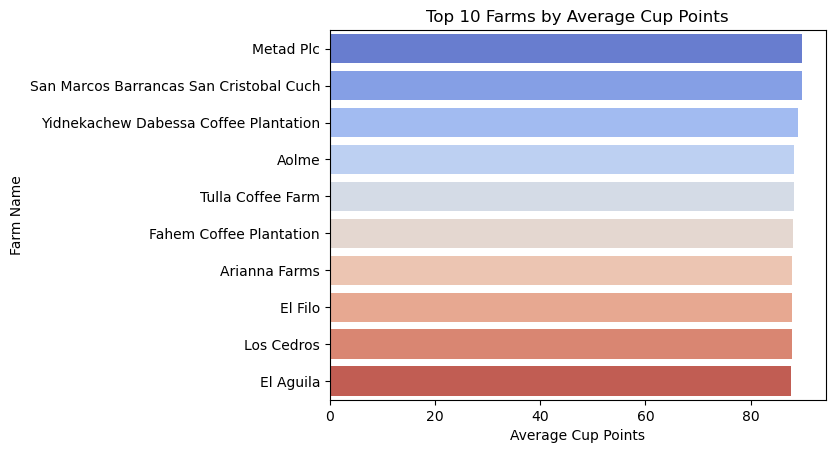

In [234]:
# 3. Top 10 farms by average cup points

top_farms = df.groupby("Farm.Name")["Total.Cup.Points"].mean().nlargest(10)
sns.barplot(x=top_farms.values, y=top_farms.index, palette="coolwarm")
plt.title("Top 10 Farms by Average Cup Points")
plt.xlabel("Average Cup Points")
plt.ylabel("Farm Name")
plt.show()

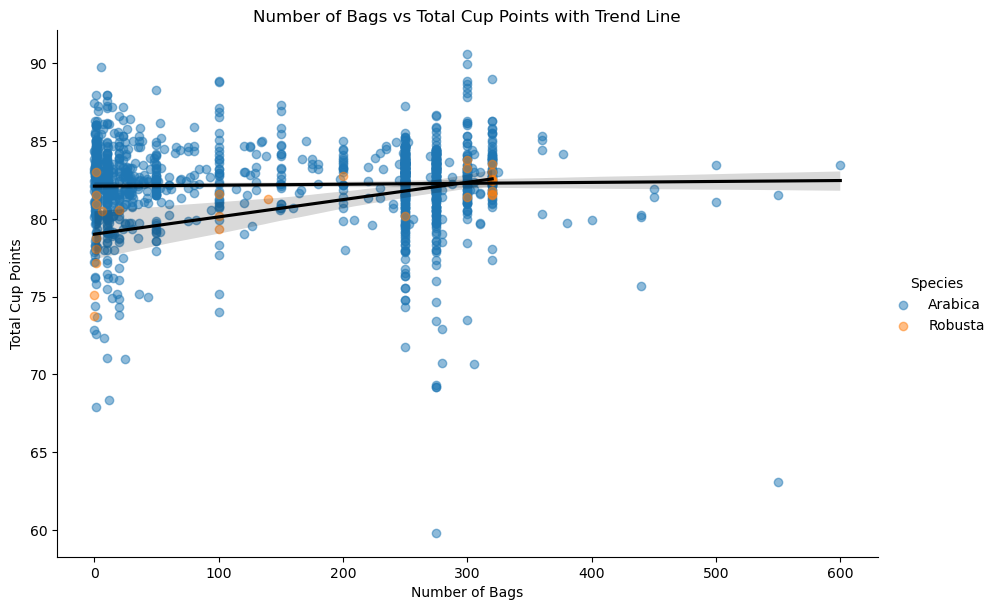

In [236]:
#4. Scatter plot: Number of Bags vs Cup Points

sns.lmplot(
    data=df,
    x="Number.of.Bags",
    y="Total.Cup.Points",
    hue="Species",
    scatter_kws={'alpha': 0.5},
    height=6,
    aspect=1.5,
    line_kws={'color': 'Black'}
)

plt.title("Number of Bags vs Total Cup Points with Trend Line")
plt.xlabel("Number of Bags")
plt.ylabel("Total Cup Points")
plt.show()

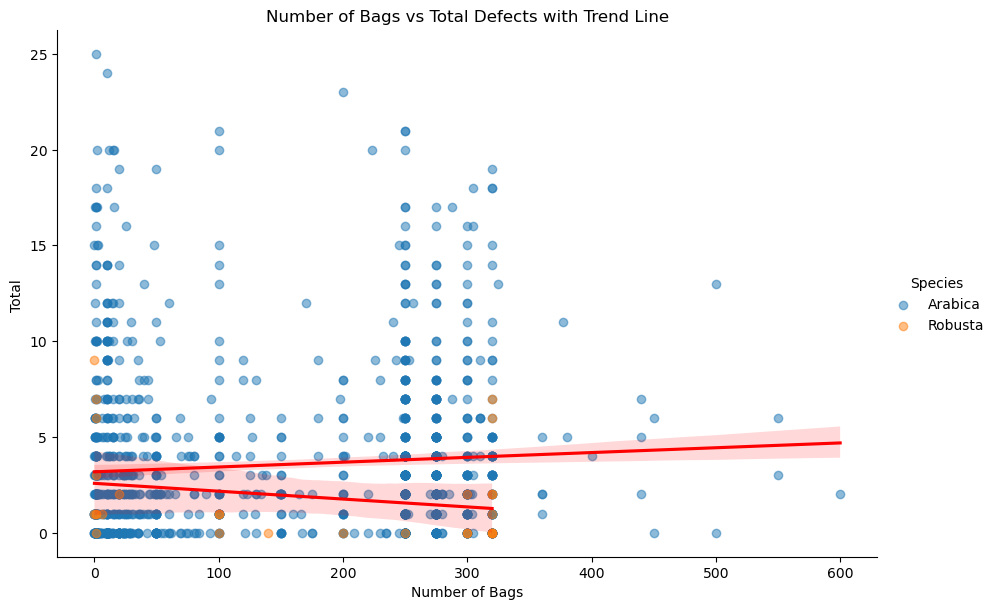

In [335]:
#5. Scatter plot: Number of Bags vs Defects

sns.lmplot(
    data=df,
    x="Number.of.Bags",
    y="Total_Defects",
    hue="Species",
    scatter_kws={'alpha': 0.5},
    height=6,
    aspect=1.5,
    line_kws={'color': 'Red'}
)

plt.title("Number of Bags vs Total Defects with Trend Line")
plt.xlabel("Number of Bags")
plt.ylabel("Total ")
plt.show()

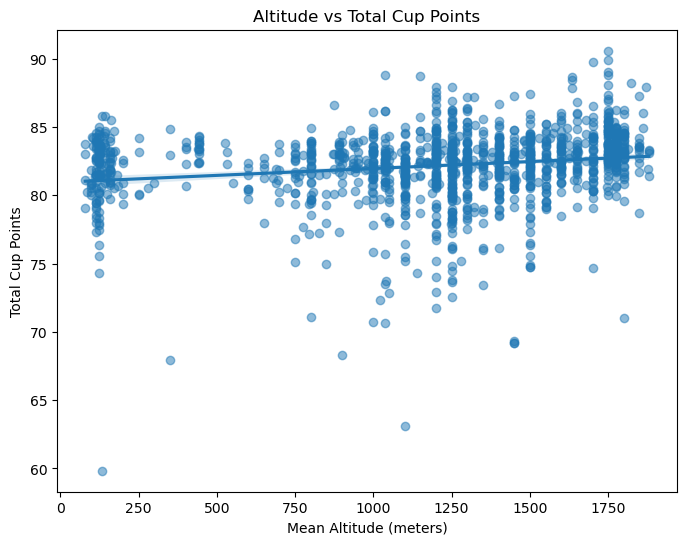

In [331]:
#6. Altitude vs Total cup points

plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='altitude_mean_meters', y='Total.Cup.Points', scatter_kws={'alpha':0.5})
plt.title("Altitude vs Total Cup Points")
plt.xlabel("Mean Altitude (meters)")
plt.ylabel("Total Cup Points")
plt.show()

In [242]:
#7. Farm with the highest number of bags

top_farm_bags = df.groupby("Farm.Name")["Number.of.Bags"].sum().sort_values(ascending=False).head(10)
top_farm_bags

Farm.Name
Unknown               57697.31
Various               11220.00
Rio Verde              6172.00
Fazenda Capoeirnha     4160.00
Several                3664.98
Capoeirinha            3110.00
Finca Medina           2982.00
Los Hicaques           2759.00
Conquista Morito       2750.00
Cerro Bueno            2200.00
Name: Number.of.Bags, dtype: float64

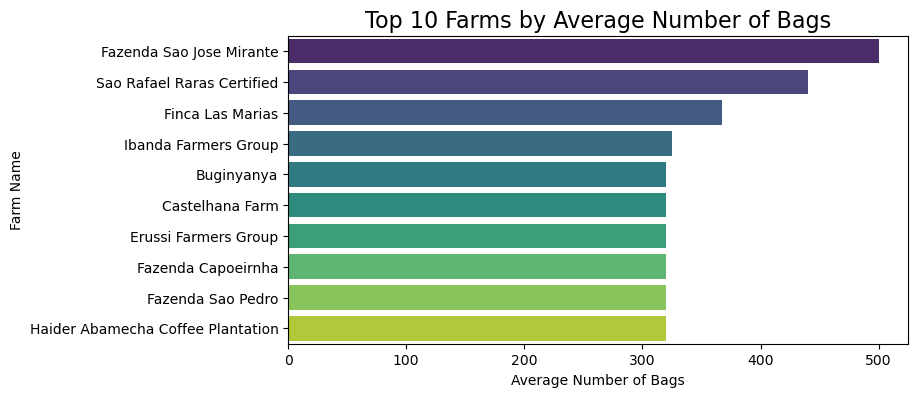

In [323]:
# Bar plot: Farm with highest number of bags
filtered_df = df[df["Farm.Name"] != "Phone Number - Email Gmtft"]
plt.figure(figsize=(8, 4))
top_farm_bags = filtered_df.groupby("Farm.Name")["Number.of.Bags"].mean().nlargest(10)
sns.barplot(x=top_farm_bags.values, y=top_farm_bags.index, palette='viridis')
plt.title("Top 10 Farms by Average Number of Bags", fontsize=16)
plt.xlabel("Average Number of Bags")
plt.ylabel("Farm Name")
plt.show()

In [246]:
#8. Country with highest number of bags
top_country_bags = df.groupby("Country.of.Origin")["Number.of.Bags"].sum().sort_values(ascending=False).head(10)
top_country_bags

Country.of.Origin
Colombia       40883.93
Guatemala      36359.35
Brazil         29790.18
Mexico         23269.58
Honduras       12892.00
Ethiopia       11590.09
Costa Rica      8447.64
Nicaragua       5906.41
Uganda          5477.00
El Salvador     4447.19
Name: Number.of.Bags, dtype: float64

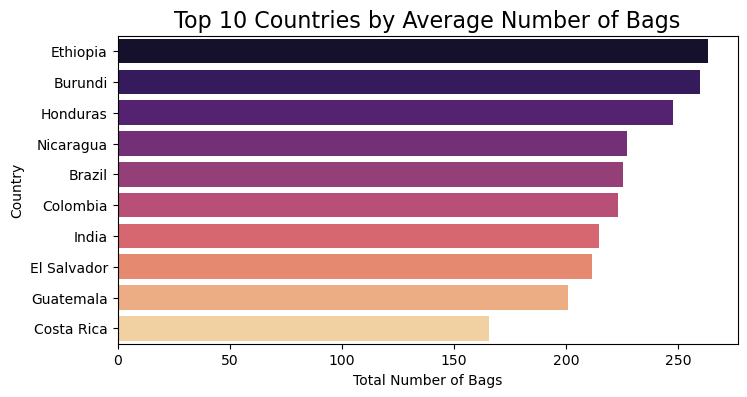

In [321]:
plt.figure(figsize=(8, 4))
top_country_bags = df.groupby("Country.of.Origin")["Number.of.Bags"].mean().nlargest(10)
sns.barplot(x=top_country_bags.values, y=top_country_bags.index, palette='magma')
plt.title("Top 10 Countries by Average Number of Bags", fontsize=16)
plt.xlabel("Total Number of Bags")
plt.ylabel("Country")
plt.show()

In [250]:
#9. Farm with highest defects
top_farm_defects = df.groupby("Farm.Name")["Total_Defects"].mean().sort_values(ascending=False).head(10)
top_farm_defects

Farm.Name
San Fernando Chiapas                21.0
Family Farm                         20.0
Zaragoza Montelibano Pamal Navil    20.0
El Centenario                       20.0
Vegas                               20.0
El Sauce                            20.0
La Gloria                           19.0
Rancho Vigia                        19.0
Producer Group Approx Farmers       16.0
Pantano                             16.0
Name: Total_Defects, dtype: float64

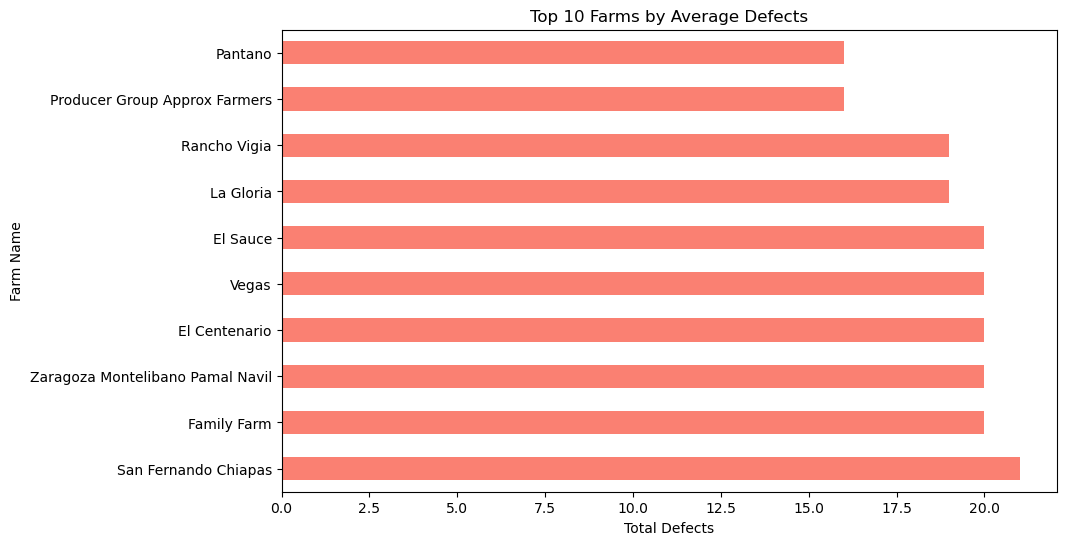

In [252]:
# Farm with highest total defects
top_farm_defects.plot(kind='barh', figsize=(10, 6), color='salmon')
plt.title("Top 10 Farms by Average Defects")
plt.xlabel("Total Defects")
plt.ylabel("Farm Name")
plt.show()

In [256]:
df['Grading.Date'] = pd.to_datetime(df['Grading.Date'], errors='coerce')
df['Expiration'] = pd.to_datetime(df['Expiration'], errors='coerce')
df['Harvest.Year'] = pd.to_numeric(df['Harvest.Year'], errors='coerce')

df['Grading_Year'] = df['Grading.Date'].dt.year
df['Grading_Month'] = df['Grading.Date'].dt.to_period('M')
df['Harvest_to_Grading_Days'] = (
    df['Grading.Date'] - pd.to_datetime(df['Harvest.Year'], format='%Y', errors='coerce')
).dt.days


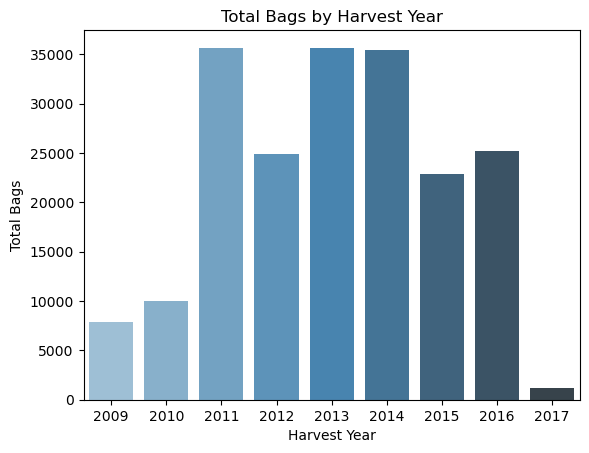

In [258]:
#10.Total bags by Harvest.Year

bags_per_year = df.groupby("Harvest.Year")["Number.of.Bags"].sum()
sns.barplot(x=bags_per_year.index, y=bags_per_year.values, palette="Blues_d")
plt.title("Total Bags by Harvest Year")
plt.xlabel("Harvest Year")
plt.ylabel("Total Bags")
plt.show()

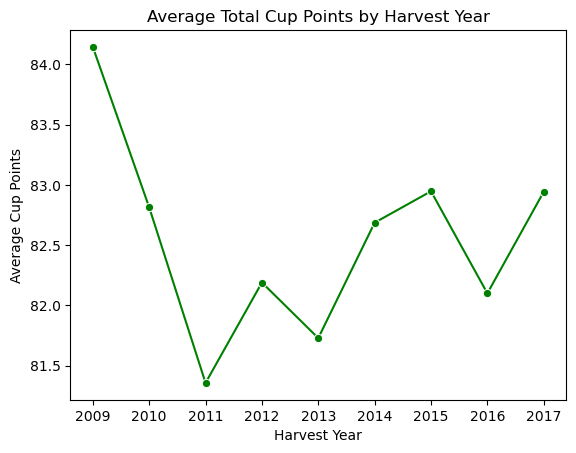

In [260]:
#11.Avg Cup Points by Harvest.Year

avg_cup_points = df.groupby("Harvest.Year")["Total.Cup.Points"].mean()
sns.lineplot(x=avg_cup_points.index, y=avg_cup_points.values, marker="o", color="green")
plt.title("Average Total Cup Points by Harvest Year")
plt.xlabel("Harvest Year")
plt.ylabel("Average Cup Points")
plt.show()

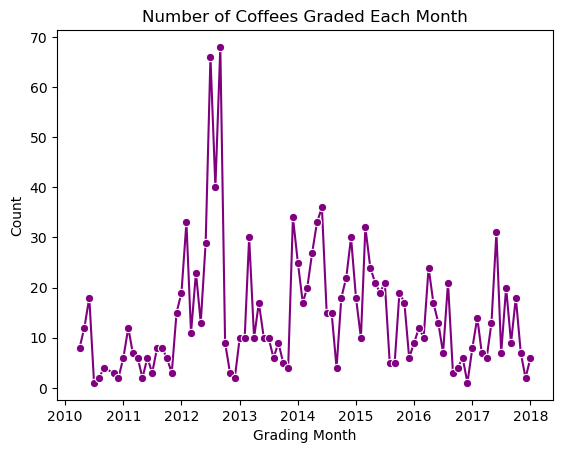

In [262]:
#12. Number of coffees graded per month

monthly_grades = df['Grading_Month'].value_counts().sort_index()
monthly_grades.index = monthly_grades.index.to_timestamp()
sns.lineplot(x=monthly_grades.index, y=monthly_grades.values, marker="o", color="purple")
plt.title("Number of Coffees Graded Each Month")
plt.xlabel("Grading Month")
plt.ylabel("Count")
plt.show()

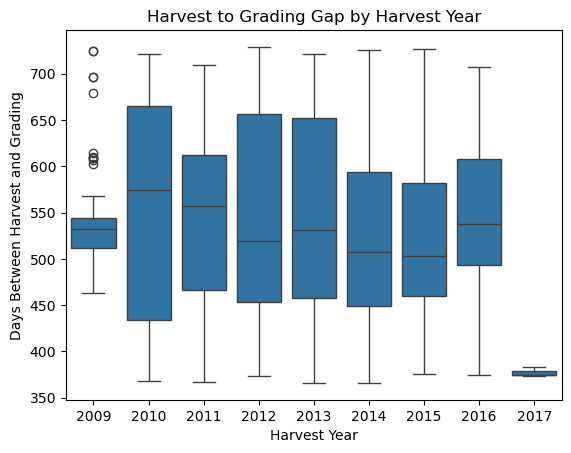

In [264]:
#13. Harvest to Grading Gap by Harvest Year

sns.boxplot(x="Harvest.Year", y="Harvest_to_Grading_Days", data=df)
plt.title("Harvest to Grading Gap by Harvest Year")
plt.xlabel("Harvest Year")
plt.ylabel("Days Between Harvest and Grading")
plt.show()

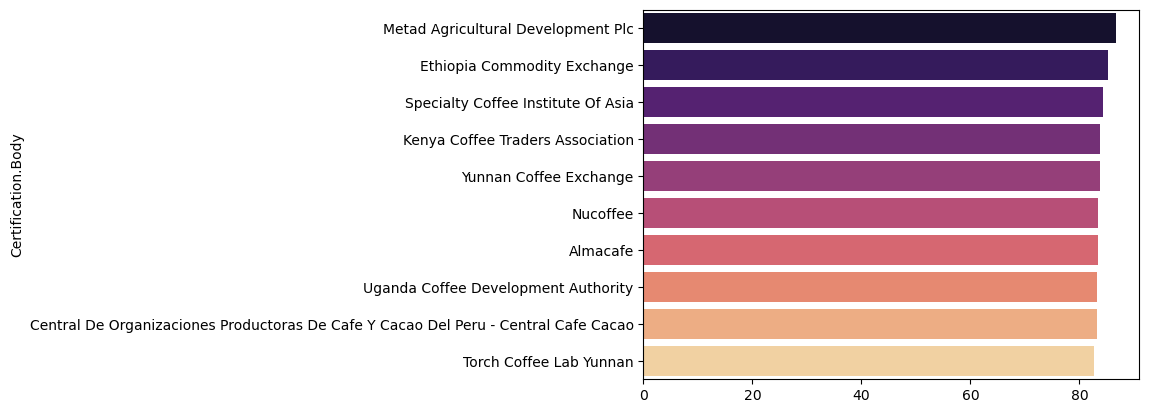

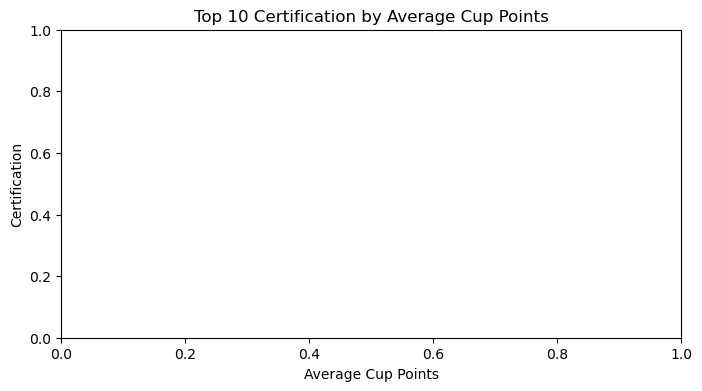

In [317]:
#14. Which Certification has higher cup.points

top_farms = df.groupby("Certification.Body")["Total.Cup.Points"].mean().nlargest(10)
sns.barplot(x=top_farms.values, y=top_farms.index, palette="magma")
plt.figure(figsize=(8, 4))
plt.title("Top 10 Certification by Average Cup Points")
plt.xlabel("Average Cup Points")
plt.ylabel("Certification")
plt.show()

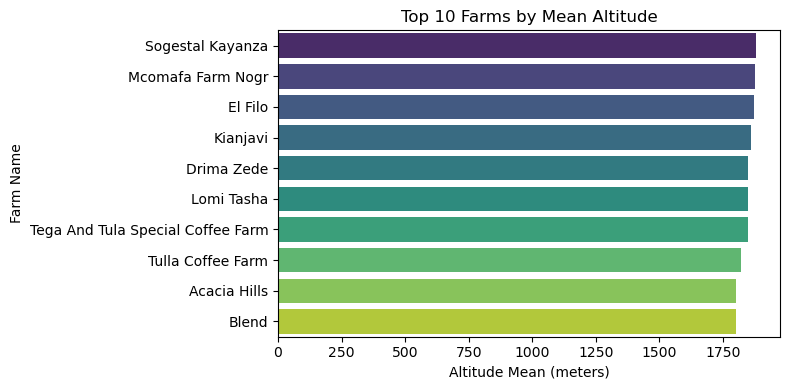

In [315]:
#15. Get top 10 farms by altitude

mean_altitudes = filtered_df.groupby('Farm.Name')['altitude_mean_meters'].mean().nlargest(10).reset_index()
plt.figure(figsize=(8, 4))
sns.barplot(data=mean_altitudes, y='Farm.Name', x='altitude_mean_meters', palette='viridis')
plt.title("Top 10 Farms by Mean Altitude")
plt.xlabel("Altitude Mean (meters)")
plt.ylabel("Farm Name")
plt.tight_layout()
plt.show()

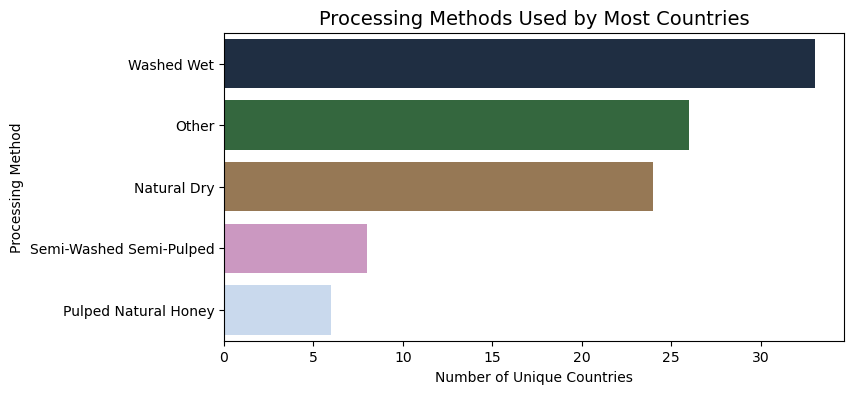

In [313]:
#16. which processing methods are used by the most countries

processing_by_country = df.groupby("Processing.Method")["Country.of.Origin"].nunique().sort_values(ascending=False)
plt.figure(figsize=(8, 4))
sns.barplot(x=processing_by_country.values, y=processing_by_country.index, palette="cubehelix")
plt.title("Processing Methods Used by Most Countries", fontsize=14)
plt.xlabel("Number of Unique Countries")
plt.ylabel("Processing Method")
plt.show()

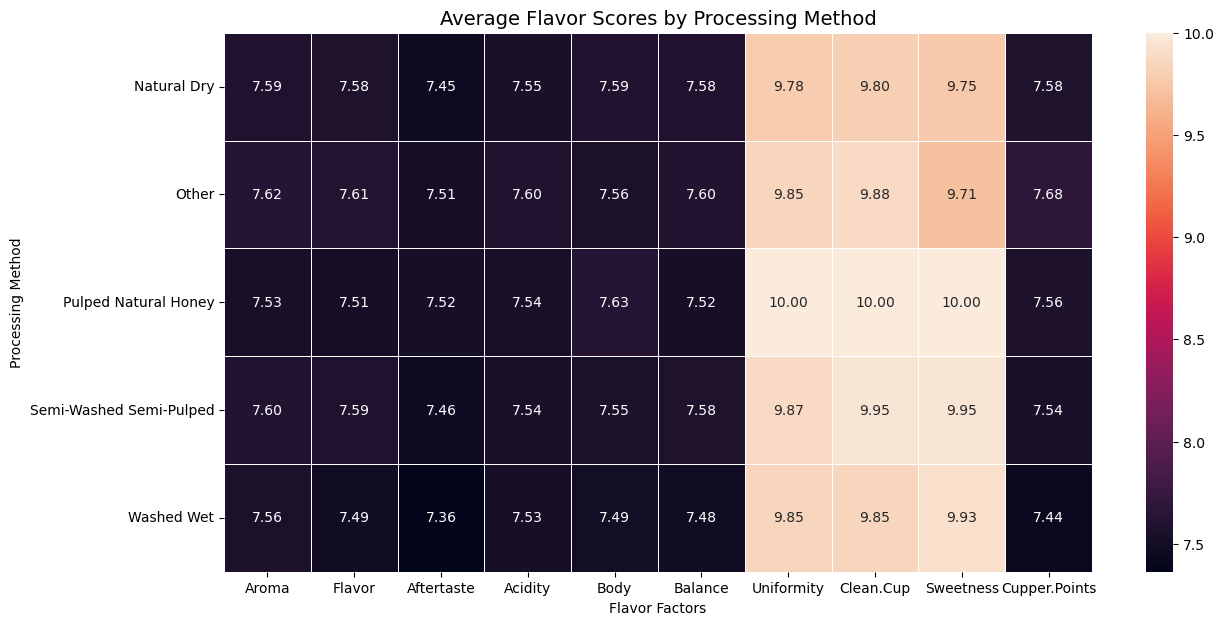

In [309]:
flavor_factors = [
    'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
    'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points'
]
processing_flavor_avg = df.groupby("Processing.Method")[flavor_factors].mean()

plt.figure(figsize=(14, 7))
sns.heatmap(processing_flavor_avg, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Average Flavor Scores by Processing Method", fontsize=14)
plt.xlabel("Flavor Factors")
plt.ylabel("Processing Method")
plt.show()

# Multi-variate Analysis

In [274]:
numerical_cols = df[['Aroma','Flavor','Aftertaste','Acidity','Body','Balance',
'Uniformity','Clean.Cup','Sweetness','Cupper.Points','Total_Defects']]

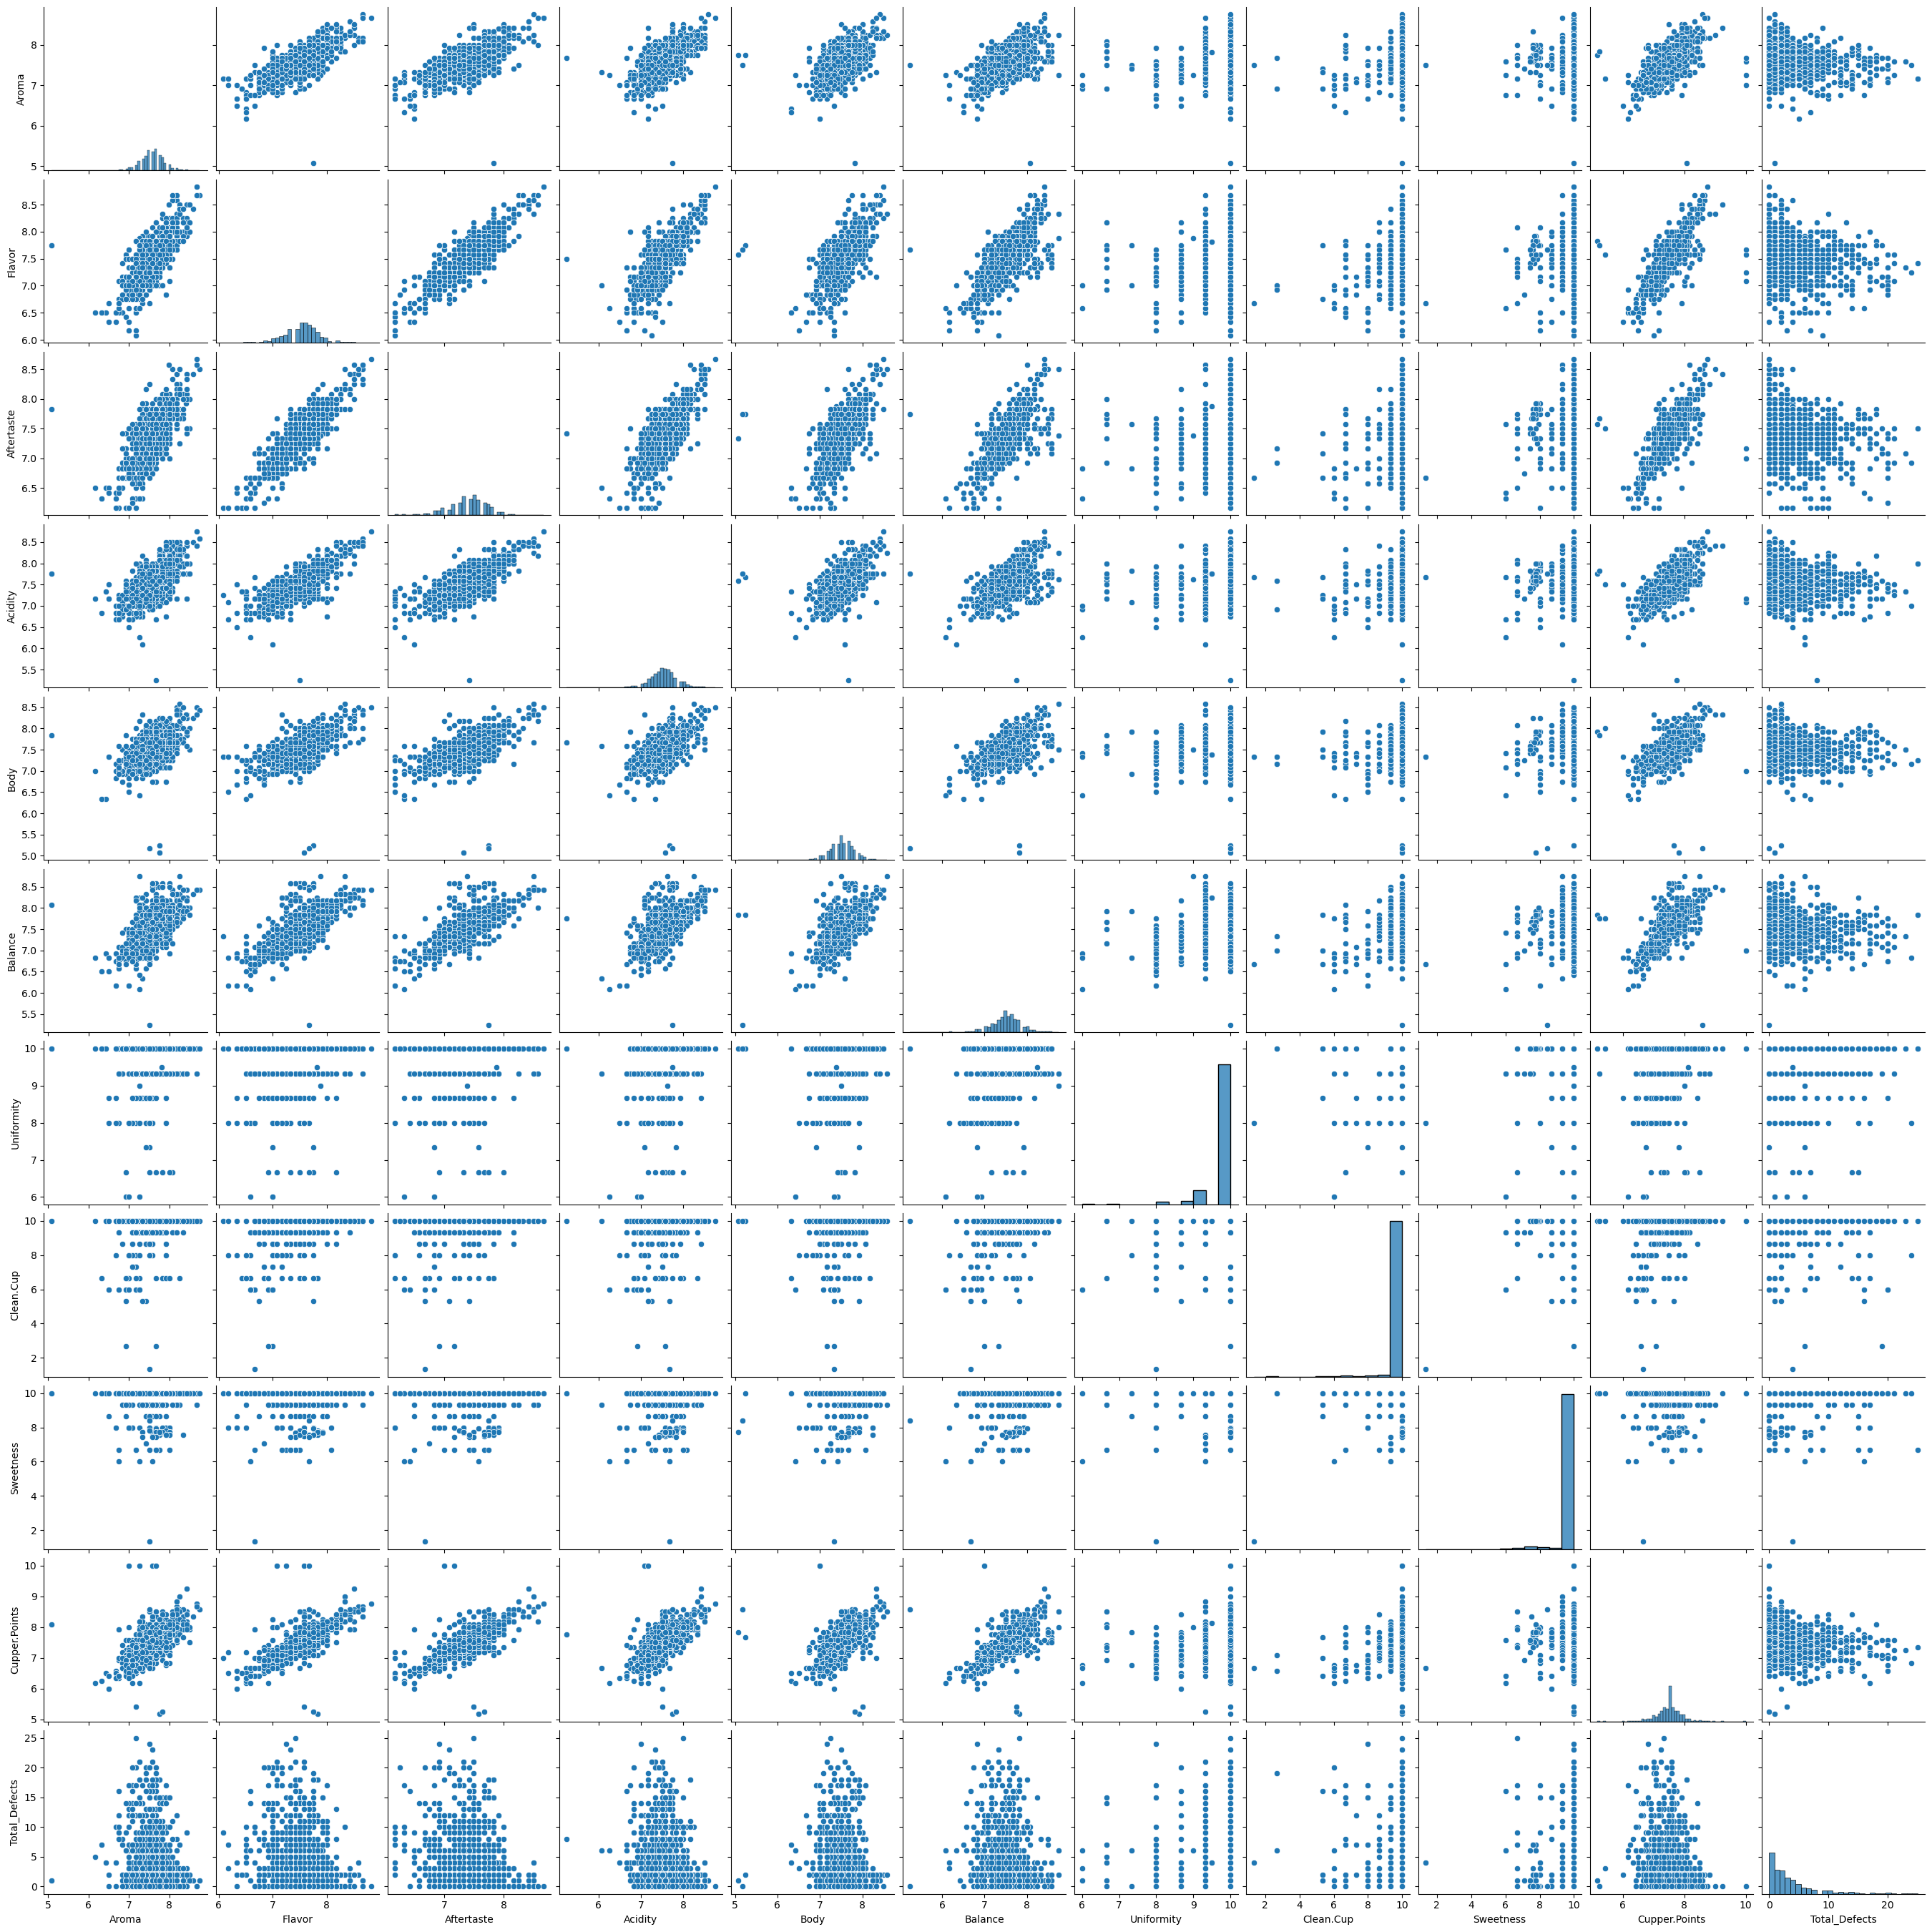

In [277]:
sns.pairplot(numerical_cols)
plt.show()

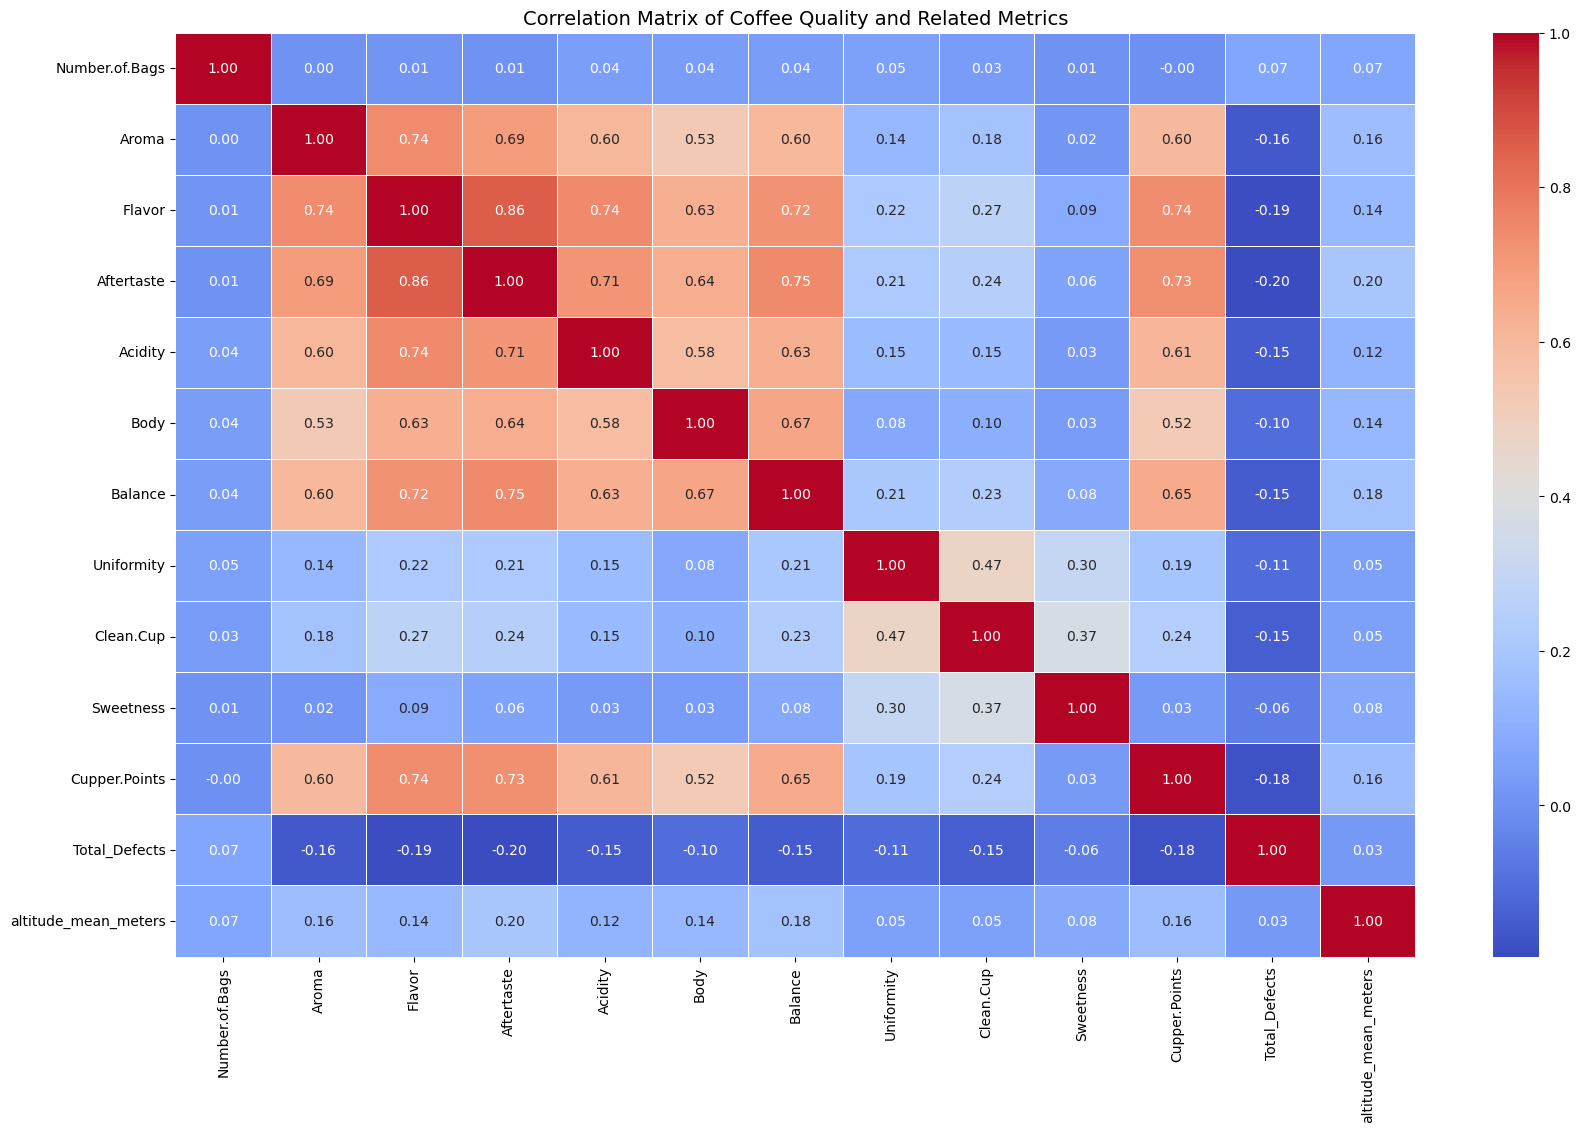

In [347]:
# the correlation matrix
numerical_cols = df[[
    'Number.of.Bags', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
    'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Total_Defects', 'altitude_mean_meters'
]]

correlation_matrix = numerical_cols.corr()
plt.figure(figsize=(20
                , 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Coffee Quality and Related Metrics", fontsize=14)
plt.show()

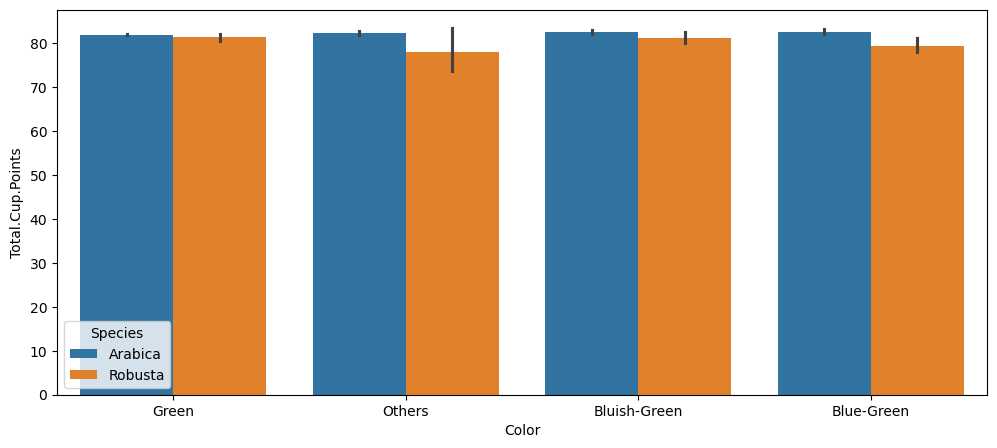

In [281]:
plt.figure(figsize=(12,5))
sns.barplot(y='Total.Cup.Points',x='Color',hue='Species',data=df)
plt.show()

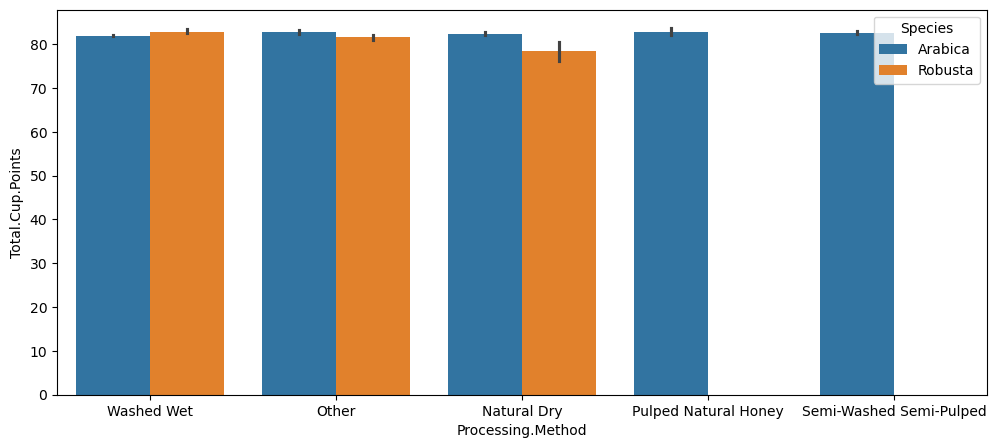

In [283]:
plt.figure(figsize=(12,5))
sns.barplot(y='Total.Cup.Points',x='Processing.Method',hue='Species',data=df)
plt.show()

# Hypothesis Testing

### Independent t-test

In [285]:
import scipy.stats as stats

# H0: The mean cup points of Arabica and Robusta are equal
# H1: The mean cup points of Arabica and Robusta are different

arabica = df[df['Species'] == 'Arabica']['Total.Cup.Points'].dropna()
robusta = df[df['Species'] == 'Robusta']['Total.Cup.Points'].dropna()

arabica_group = np.array(arabica)
robusta_group = np.array(robusta)

t_stat, p_value = stats.ttest_ind(a=arabica_group, b=robusta_group, equal_var=False)

print("T-Test: Arabica vs Robusta Cup Points")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: Significant difference in cup points.")
else:
    print("Fail to reject the null hypothesis: No significant difference in cup points.")



T-Test: Arabica vs Robusta Cup Points
T-statistic: 2.8078234645068805
P-value: 0.008918153430452722
Reject the null hypothesis: Significant difference in cup points.


### One-Way ANOVA

In [287]:
# H0: All varieties have the same mean defect rate(There is no change in varieties on total defects)
# H1: No,variety has a different mean defect rate

variety_groups = df[['Variety', 'Total_Defects']].dropna().groupby('Variety')['Total_Defects'].apply(list)

f_stat, p_value = stats.f_oneway(*variety_groups)

print("\nANOVA: Variety vs Total Defects")
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: Variety significantly affects defect rate.")
else:
    print("Fail to reject the null hypothesis: No significant effect of variety on defect rate.")



ANOVA: Variety vs Total Defects
F-statistic: 3.1829667240583266
P-value: 1.4802691924511914e-07
Reject the null hypothesis: Variety significantly affects defect rate.


In [293]:
# H0: All countries have the same mean cup points
# H1: No,country's mean cup points is different

country_groups = df[['Country.of.Origin', 'Total.Cup.Points']].dropna().groupby('Country.of.Origin')['Total.Cup.Points'].apply(list)

f_stat, p_value = stats.f_oneway(*country_groups)

print("\nANOVA: Country of Origin vs Total Cup Points")
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: Country significantly impacts cup quality.")
else:
    print("Fail to reject the null hypothesis: No significant impact of country on cup quality.")



ANOVA: Country of Origin vs Total Cup Points
F-statistic: 8.322852002175953
P-value: 2.4077592442214183e-37
Reject the null hypothesis: Country significantly impacts cup quality.


In [291]:
 #df.to_excel('cleaned_data.xlsx', index=False)